# What drives the price of a car?

![](https://imgur.com/dKKBfjo.png)


**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand **what factors make a car more or less expensive**.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to **what consumers value in a used car**.

### CRISP-DM Framework

![](https://i.imgur.com/NCFR6pe.png)


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

From a business perspective, we are asked to identify the factors that influence used car prices. In CRISP-DM terms, we are asked to convert this business problem into a data problem definition.
### Business Objectives:
  - As a client of a car dealership, we want to identify what features play a key role in a used car's price.
  - Based on the recommendations, dealerships can stock up on cars with those features that are significant for used cars based on our analysis.  
  - Dealerships can increase their profit if they implement our recommendations and stock used cars with those recommended features.

### Assumptions:

- VINs are unique identifications for a car and no two cars can have the same VIN.
- Used car prices depend on the condition of the car, the better the condition, the higher the price. (condition)
- The older the car becomes the price drops. (age of car or year of manufacture)
- The more used the car is, the more the price is. (odometer reading).

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

First, the dataset was analyzed in detail. The dataset contained 427K records, with 3 numerical and 13 categorical features: id, price, year, manufacturer, model, condition, cylinders, fuel, title_status, transmission, VIN, drive, size, type, paint_color, and state.

With close consideration, outliers were identified for some of the features that would skew the data. To avoid any skewness, the outliers were removed. Identified duplicate VINs and those were removed first. Later, Nan's, and values like 'other' were removed/imputed.

Visualized the data using a seaborn plot to understand each feature.
- Of the Luxury brands, Ferrari was the most pricey with a price > 65K.
- Of the Economy brands, Volkswagen was the most pricey with a price >12K.
- The 'Other' transmission type was more pricey followed by `automatic` and then `manual`. I assume that the other category is unknown or data missing.
- Fuel type `Diesel` was more pricey followed by `Electric`. Hybrid cars were the least.
- `4WD` drive types were more pricey compared to `RWD` and `FWD`.
- `PICKUP` cars were more pricey followed by `TRUCK`.
- Most used cars were `OFFROAD` type followed by `CONVERTIBLE`.
- There are cars with 0~100K price cars in the dataset. As the odometer reading increases, the price of the car decreases.

#### Data Preparation
As part of data cleaning, we performed the below.
- Dropped the id column since it's holding a unique identifier that has no predictive meaning
- Dropped the size column since it's missing more than 70% of its data
- Dropped duplicate VINs, with the assumption that no two cars can have the same VINs.
- Dropped the VIN column after cleaning the duplicates, since it's just holding a unique identifier that has no predictive meaning
- Removed odometer outliers and kept cars with odometer which is less than 500K
- Removed cars with age > 80
- Remove price outliers and keep cars with prices between 100 and 100,000 USD
- Removed all title_status besides clean as 90% of data had `clean` title status.
- Removed rows that contained other value  


In [1]:
#install the packages, when you run for the first time
!pip install category_encoders feature_engine --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 17.0 MB/s eta 0:00:00


In [2]:
# install and import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import mean_squared_error, r2_score
sns.set_style('darkgrid')
# Set the Seaborn style
sns.set()

In [3]:
# Load the dataset
vehicles = pd.read_csv('vehicles.csv')

In [4]:
# check sample of the data
vehicles.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
390571,7314692238,fredericksburg,11995,2012.0,nissan,quest,NaN,NaN,gas,132326.0,clean,automatic,JN8AE2KP3C9033834,NaN,NaN,other,black,va
135641,7305891325,pullman / moscow,31999,2017.0,ram,1500 sport 4x4 1/2 ton,NaN,NaN,gas,101915.0,clean,automatic,1C6RR7UT0HS625340,4wd,NaN,truck,grey,id
134747,7311309820,lewiston / clarkston,7900,2007.0,gmc,yukon slt,NaN,8 cylinders,gas,197046.0,clean,automatic,1GKFK13067R237110,4wd,NaN,SUV,NaN,id
148058,7314133278,"st louis, MO",6500,1992.0,cadillac,allante convertible,excellent,8 cylinders,gas,77000.0,clean,automatic,NaN,fwd,mid-size,convertible,white,il
339061,7310297161,reading,32990,2018.0,jaguar,e-pace p250 s sport,good,NaN,other,26685.0,clean,other,SADFJ2FX1J1Z13468,NaN,NaN,other,white,pa


In [5]:
# select the columns that needs to be used in this project
# `id` and `region` are skipped, as there doesn't seem to a direct connection of these fields with price of the used cars

selected_columns = [
                    'price',
                    'year',
                    'manufacturer',
                    'model',
                    'condition',
                    'cylinders',
                    'fuel',
                    'odometer',
                    'title_status',
                    'transmission',
                    'VIN',
                    'drive',
                    'size',
                    'type',
                    'paint_color',
                    'state']

selected_dtypes = {
    'price': 'float32'}

In [6]:
%%time
# Loading the data with selected columns, selected dtypes and parse_dates
vehicles = pd.read_csv('vehicles.csv',
                        usecols=selected_columns,
                        dtype=selected_dtypes,
                        parse_dates=['year']
)
#length of dataframe
totalrecords = len(vehicles)
print(f'Number of records in the dataset : {totalrecords}')

Number of records in the dataset : 426880
CPU times: user 1.7 s, sys: 220 ms, total: 1.92 s
Wall time: 3.2 s


In [7]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   price         426880 non-null  float32       
 1   year          425675 non-null  datetime64[ns]
 2   manufacturer  409234 non-null  object        
 3   model         421603 non-null  object        
 4   condition     252776 non-null  object        
 5   cylinders     249202 non-null  object        
 6   fuel          423867 non-null  object        
 7   odometer      422480 non-null  float64       
 8   title_status  418638 non-null  object        
 9   transmission  424324 non-null  object        
 10  VIN           265838 non-null  object        
 11  drive         296313 non-null  object        
 12  size          120519 non-null  object        
 13  type          334022 non-null  object        
 14  paint_color   296677 non-null  object        
 15  state         426

We've chosen 16 features to be analyzed for this project. The features are 'Price', 'Year', 'Manufacturer', 'Condition', 'Cylinders', 'Fuel', 'Odometer',
       'Title_status', 'Transmission', 'Drive', 'Type', 'Paint_color', 'State', 'Age'. Here, `Price` is the target variable.
During the analysis, if we find the feature is not adding any value to the `price`, then we may drop the feature.

In [8]:
# vehicles_len = len(vehicles)
# print(f"Number of records before dropping duplicates {vehicles_len}")
# vehicles = vehicles.drop_duplicates()
# print(f"Number of records in the dataset after duplicates removed: {len(vehicles)}")

In [9]:
# vehicles_len = len(vehicles)
# print(f"Number of records before dropping duplicates {vehicles_len}")
# duplicated = vehicles.loc[vehicles.duplicated(['year', 'odometer', 'VIN'], keep='last')]
# vehicles = vehicles.drop(duplicated.index, axis=0)
# print(f"Number of records in the dataset after duplicates removed: {len(vehicles)}")
# print(f'% of duplicates for VIN {((vehicles_len - len(vehicles)) / vehicles_len) * 100 }%')

In [10]:
# Calculate the missing values in each feature with their percentage
NA_columns = ['NA Count', '% of Total']
NA = pd.concat([vehicles.isnull().sum(), ((vehicles.isnull().sum()) / len(vehicles)) * 100], axis=1, keys=NA_columns)
NA.style.background_gradient(cmap="Pastel1_r", subset=['NA Count'])

,NA Count,% of Total
price,0,0.000000
year,1205,0.282281
manufacturer,17646,4.133714
model,5277,1.236179
condition,174104,40.785232
cylinders,177678,41.622470
fuel,3013,0.705819
odometer,4400,1.030735
title_status,8242,1.930753
transmission,2556,0.598763


<ipython-input-11-2d49ec7d30bf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(x= NA.index, y=NA['% of Total'], palette='deep')


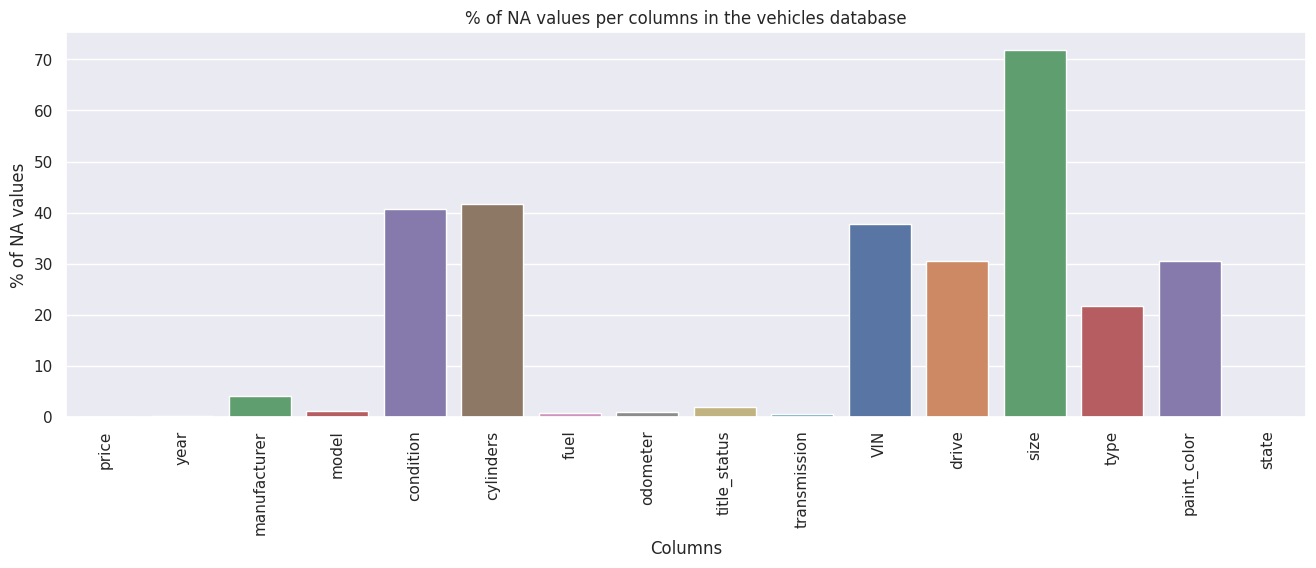

<Figure size 640x480 with 0 Axes>

In [11]:
fig = plt.figure(figsize=(16, 5))

fig = sns.barplot(x= NA.index, y=NA['% of Total'], palette='deep')
fig.set(xlabel = 'Columns', ylabel = '% of NA values',title = '% of NA values per columns in the vehicles database');
plt.xticks(rotation=90)
plt.figure();

It is evident that `size` has maximum missing values, followed by VIN.

In [12]:
# trying to see what duplicated VINs are left after the initial VIN cleanup
# before_VINs = len(vehicles)
# duplicated = vehicles.loc[vehicles.duplicated(['VIN'], keep='last')]
# vehicles = vehicles.drop(duplicated.index, axis=0)
# duplicated.tail()
# print(f"Number of records in the dataset after duplicates removed: {len(vehicles)}")
# print(f'% of duplicates for VIN {((before_VINs - len(vehicles)) / before_VINs) * 100 }%')

In [13]:
print(f"Number of records before dropping duplicates {len(vehicles)}")
vehicles.drop_duplicates(['VIN'], inplace=True)
print(f"Number of records after dropping duplicates {len(vehicles)}")
vehicles.info()

Number of records before dropping duplicates 426880
Number of records after dropping duplicates 118247
<class 'pandas.core.frame.DataFrame'>
Int64Index: 118247 entries, 0 to 426833
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   price         118247 non-null  float32       
 1   year          117653 non-null  datetime64[ns]
 2   manufacturer  115179 non-null  object        
 3   model         117542 non-null  object        
 4   condition     61082 non-null   object        
 5   cylinders     70266 non-null   object        
 6   fuel          116608 non-null  object        
 7   odometer      116671 non-null  float64       
 8   title_status  114608 non-null  object        
 9   transmission  117010 non-null  object        
 10  VIN           118246 non-null  object        
 11  drive         90898 non-null   object        
 12  size          30310 non-null   object        
 13  type          10

We can delete the 'VIN' column as this has no significane to the price of the used car.

In [14]:
vehicles = vehicles.drop(columns='VIN', axis=1)

There is almost 74% of missing value for `size` feature, hence the column can be dropped.

In [15]:
# Droppping the size feature
vehicles['size'].isna().sum()
print(f"Dropping size since it has : {vehicles['size'].isna().sum()} missing values")
vehicles = vehicles.drop(columns = ['size'])

Dropping size since it has : 87937 missing values


In [16]:
# converting upper case and finding unique values
vehicles.model = vehicles.model.str.upper()
unq_model = vehicles['model'].nunique()
print(f"Number of unique models in the vehicles dataset: {unq_model}")
vehicles['fuel'] = vehicles['fuel'].str.capitalize()
print(f"\n Unique values for 'fuel' {vehicles['fuel'].unique()}")
vehicles.drive = vehicles.drive.str.upper()
print(f"\n Unique values for 'drive' {vehicles['drive'].unique()}")
vehicles.manufacturer = vehicles['manufacturer'].str.capitalize()
print(f"\n Unique values for 'manufacturer' {vehicles['manufacturer'].unique()}")
vehicles.state = vehicles.state.str.upper()
print(f"\n Unique values for 'state' {vehicles['state'].unique()}")
vehicles.type = vehicles.type.str.upper()
print(f"\n Unique values for 'type' {vehicles['type'].unique()}")
vehicles.title_status = vehicles.title_status.str.upper()
print(f"\n Unique values for 'type' {vehicles['title_status'].unique()}")

Number of unique models in the vehicles dataset: 17246

 Unique values for 'fuel' [nan 'Gas' 'Other' 'Diesel' 'Hybrid' 'Electric']

 Unique values for 'drive' [nan '4WD' 'RWD' 'FWD']

 Unique values for 'manufacturer' [nan 'Gmc' 'Chevrolet' 'Toyota' 'Jeep' 'Ford' 'Nissan' 'Ram' 'Mazda'
 'Cadillac' 'Honda' 'Lexus' 'Jaguar' 'Buick' 'Volvo' 'Audi' 'Infiniti'
 'Lincoln' 'Alfa-romeo' 'Acura' 'Hyundai' 'Bmw' 'Chrysler' 'Mitsubishi'
 'Kia' 'Porsche' 'Dodge' 'Mercedes-benz' 'Subaru' 'Ferrari' 'Mini'
 'Pontiac' 'Volkswagen' 'Fiat' 'Rover' 'Tesla' 'Mercury' 'Saturn'
 'Harley-davidson' 'Datsun' 'Aston-martin' 'Land rover']

 Unique values for 'state' ['AZ' 'AL' 'AK' 'AR' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NC'
 'NE' 'NV' 'NJ' 'NM' 'NY' 'NH' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']

 Unique values for 'type' [nan 'PICKUP' 'OTHER' 'COUPE' 'SUV' 'HATCHBACK' 'SEDAN' 'VAN' 'WA

`Model` has 17246 unique values and since, the data is not clean, we'll be dealing with a lot of unforeseen issues. So, we will need to drop this field.

In [17]:
# Droppping the model feature
vehicles = vehicles.drop(columns = ['model'])

Evaluate the unique values of `cylinders` and `condition` and their counts.

In [18]:
vehicles['cylinders'].value_counts().sort_values()

12 cylinders       55
3 cylinders       214
10 cylinders      307
other             469
5 cylinders       542
8 cylinders     16905
6 cylinders     25648
4 cylinders     26126
Name: cylinders, dtype: int64

In [19]:
vehicles['condition'].value_counts().sort_values()

salvage         60
new            322
fair           774
like new      3963
good         23898
excellent    32065
Name: condition, dtype: int64

In [20]:
vehicles['title_status'].value_counts().sort_values()

PARTS ONLY        11
MISSING           41
LIEN             200
SALVAGE          550
REBUILT         1443
CLEAN         112363
Name: title_status, dtype: int64

Considering that no one would want to purchase a `salvage` car, dropping the value from `condition`. For the `cylinders`, `fuel` and `type`, there is a value `other` which would mean an unknown value, dropping the value. Also, since 90% of the data for the title status is `clean`, dropping all values except `clean`.

In [21]:
vehicles = vehicles.drop(vehicles[vehicles['condition'] == 'salvage'].index)
vehicles = vehicles.drop(vehicles[vehicles['cylinders'] == 'other'].index)
vehicles = vehicles.drop(vehicles[vehicles['fuel'] == 'other'].index)
vehicles = vehicles.drop(vehicles[vehicles['type'] == 'other'].index)

vehicles = vehicles.drop(vehicles[vehicles['title_status'] == 'salvage'].index)
vehicles = vehicles.drop(vehicles[vehicles['title_status'] == 'nan'].index)
vehicles = vehicles.drop(vehicles[vehicles['title_status'] == 'parts only'].index)
vehicles = vehicles.drop(vehicles[vehicles['title_status'] == 'lien'].index)
vehicles = vehicles.drop(vehicles[vehicles['title_status'] == 'rebuilt'].index)

In [22]:
# Look at the statistical data for the dataset
vehicles.describe()

,price,odometer
count,1.177190e+05,1.161450e+05
mean,1.784202e+04,9.020308e+04
std,3.607167e+05,9.633637e+04
min,0.000000e+00,0.000000e+00
25%,6.000000e+03,4.034500e+04
50%,1.333300e+04,8.455300e+04
75%,2.398800e+04,1.267960e+05
max,1.234568e+08,1.000000e+07


#### Data Cleaning

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In order to find how old that car is, we're adding a new column `age` to the dataset.

In [23]:
import datetime

today = datetime.datetime.now()
vehicles['age'] = datetime.date.today().year - vehicles['year'].dt.year


vehicles.sample(10)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,age
97031,34975.0,NaT,NaN,NaN,4 cylinders,Gas,33863.0,CLEAN,automatic,RWD,COUPE,red,FL,NaN
45962,11900.0,2008-01-01,Subaru,NaN,4 cylinders,Gas,135917.0,CLEAN,manual,4WD,WAGON,grey,CA,16.0
87419,20990.0,2019-01-01,Hyundai,good,NaN,Other,44513.0,CLEAN,other,NaN,SUV,brown,CT,5.0
157034,8995.0,2008-01-01,Bmw,excellent,6 cylinders,Gas,113217.0,CLEAN,automatic,NaN,SEDAN,NaN,IA,16.0
101741,85.0,2014-01-01,Mitsubishi,good,3 cylinders,Gas,54324.0,CLEAN,automatic,RWD,HATCHBACK,grey,FL,10.0
238059,0.0,2008-01-01,Chevrolet,NaN,8 cylinders,Diesel,100188.0,CLEAN,automatic,4WD,PICKUP,white,NC,16.0
54400,0.0,2013-01-01,Audi,excellent,NaN,Gas,31203.0,CLEAN,automatic,FWD,SEDAN,grey,CA,11.0
228818,51998.0,2019-01-01,Gmc,NaN,8 cylinders,Gas,52947.0,CLEAN,automatic,4WD,TRUCK,NaN,MT,5.0
55148,6895.0,2016-01-01,Volkswagen,like new,4 cylinders,Gas,85000.0,CLEAN,automatic,NaN,SEDAN,NaN,CA,8.0
336667,26888.0,2014-01-01,Gmc,NaN,NaN,Gas,140355.0,CLEAN,automatic,NaN,OTHER,white,PA,10.0


Let's see the minimum, maximum and standard deviation of the numerical features `price`, `age` and `odometer` to find any outliers.

In [24]:
vehicles.price.min(), vehicles.price.max(), vehicles.price.std()

(0.0, 123456790.0, 360716.7)

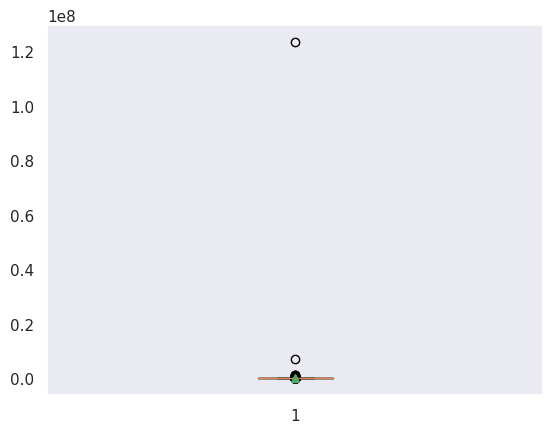

In [25]:
# Plot boxplot for odometer
plt.boxplot(vehicles['price'], showmeans=True)
plt.grid()
plt.show()

We see some price values in 1.2M as outliers, we do not want these values to skew our dataset, so we'll drop these.

In [26]:
vehicles.age.min(), vehicles.age.max(), vehicles.age.std()

(2.0, 121.0, 6.7745778071394716)

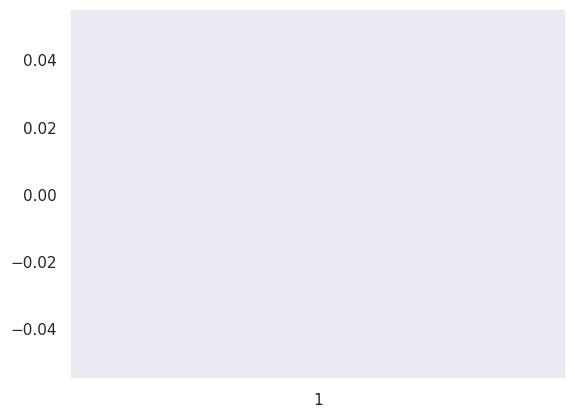

In [27]:
# Plot boxplot for odometer
plt.boxplot(vehicles['age'], showmeans=True)
plt.grid()
plt.show()

We do not see any outliers values from the boxplot, but still we see age=121.0, we do not want to keep such old cars. So, we'll only be considering cars with age < 80 years old.

In [28]:
vehicles.odometer.min(), vehicles.odometer.max(), vehicles.odometer.std()

(0.0, 10000000.0, 96336.36690219237)

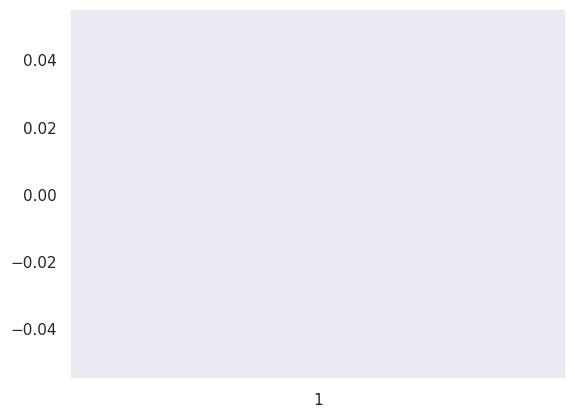

In [29]:
# Plot boxplot for odometer
plt.boxplot(vehicles['odometer'], showmeans=True)
plt.grid()
plt.show()

From the boxplot, the outliers are not clear, but we see that odometer has `10000000.0` as the highest value and this will skew the data. So, we'll be considering < 500000.

In [30]:
missing_year = vehicles.loc[vehicles['year'].isna()]
print(f"year column is missing {len(missing_year)} values. We'll drop them")
vehicles = vehicles.drop(missing_year.index, axis=0)
missing_odo = vehicles.loc[vehicles['odometer'].isna()]
print(f"odemeter column is missing {len(missing_odo)} values. We'll drop them")
vehicles = vehicles.drop(missing_odo.index, axis=0)

year column is missing 594 values. We'll drop them
odemeter column is missing 1572 values. We'll drop them


Let's remove the outliers from the `age`, `price` and `odometer`.



In [31]:
vehicles = vehicles[vehicles['age']< 80]
vehicles = vehicles[vehicles['price']< 100000]
vehicles = vehicles[vehicles['price']>100]
vehicles = vehicles[vehicles['odometer']< 500000]

In [32]:
vehicles['year'] = vehicles['year'].dt.year  # since Year is a datetime field

In [33]:
# zero_odometer_old_cars = vehicles.loc[(vehicles['odometer'] == 0) & (vehicles['age'] > 3)]
# print(f"old cars with zero odometer: {len(zero_odometer_old_cars)} values. We'll drop them")
# vehicles = vehicles.drop(zero_odometer_old_cars.index, axis=0)

In [34]:
len(vehicles)

103161

In [35]:
#capitalize the dataset columns
vehicles.columns = vehicles.columns.str.capitalize()

## Data Visualization

Plotting the correlation matrix, to see if the numeric features `price`, `odometer` and `age` have any correlation.

<ipython-input-36-5ca4106ab5ab>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = vehicles.corr()


             Price      Year  Odometer       Age
Price     1.000000  0.397538 -0.475704 -0.397538
Year      0.397538  1.000000 -0.472108 -1.000000
Odometer -0.475704 -0.472108  1.000000  0.472108
Age      -0.397538 -1.000000  0.472108  1.000000


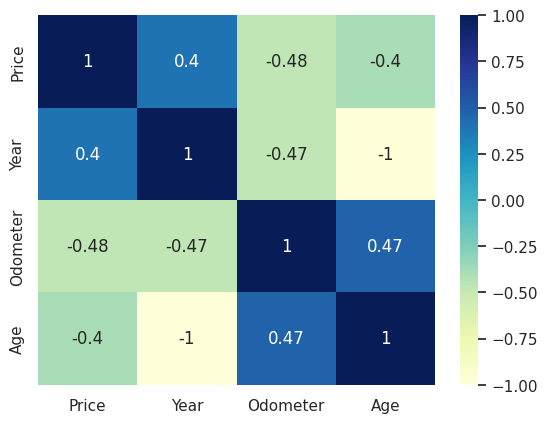

In [36]:
pd.set_option('display.width', 100)
# pd.set_option('precision', 3)

# Correlation Matrix formation
corr_matrix = vehicles.corr()
corr_matrix.fillna(0, inplace=True) #imputing the Nan with 0
print(corr_matrix)

#Using heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1);

We see that `price` has a positive correlation with `year` and negative correlation with both `age` and `odometer`.

In [37]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103161 entries, 27 to 426833
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Price         103161 non-null  float32
 1   Year          103161 non-null  int64  
 2   Manufacturer  101017 non-null  object 
 3   Condition     55968 non-null   object 
 4   Cylinders     62997 non-null   object 
 5   Fuel          101964 non-null  object 
 6   Odometer      103161 non-null  float64
 7   Title_status  100143 non-null  object 
 8   Transmission  102376 non-null  object 
 9   Drive         80311 non-null   object 
 10  Type          89455 non-null   object 
 11  Paint_color   78069 non-null   object 
 12  State         103161 non-null  object 
 13  Age           103161 non-null  float64
dtypes: float32(1), float64(2), int64(1), object(10)
memory usage: 11.4+ MB


Plotting the 'Relationship between Odometer readings, Price and Age' using a seaborn scatterplot.

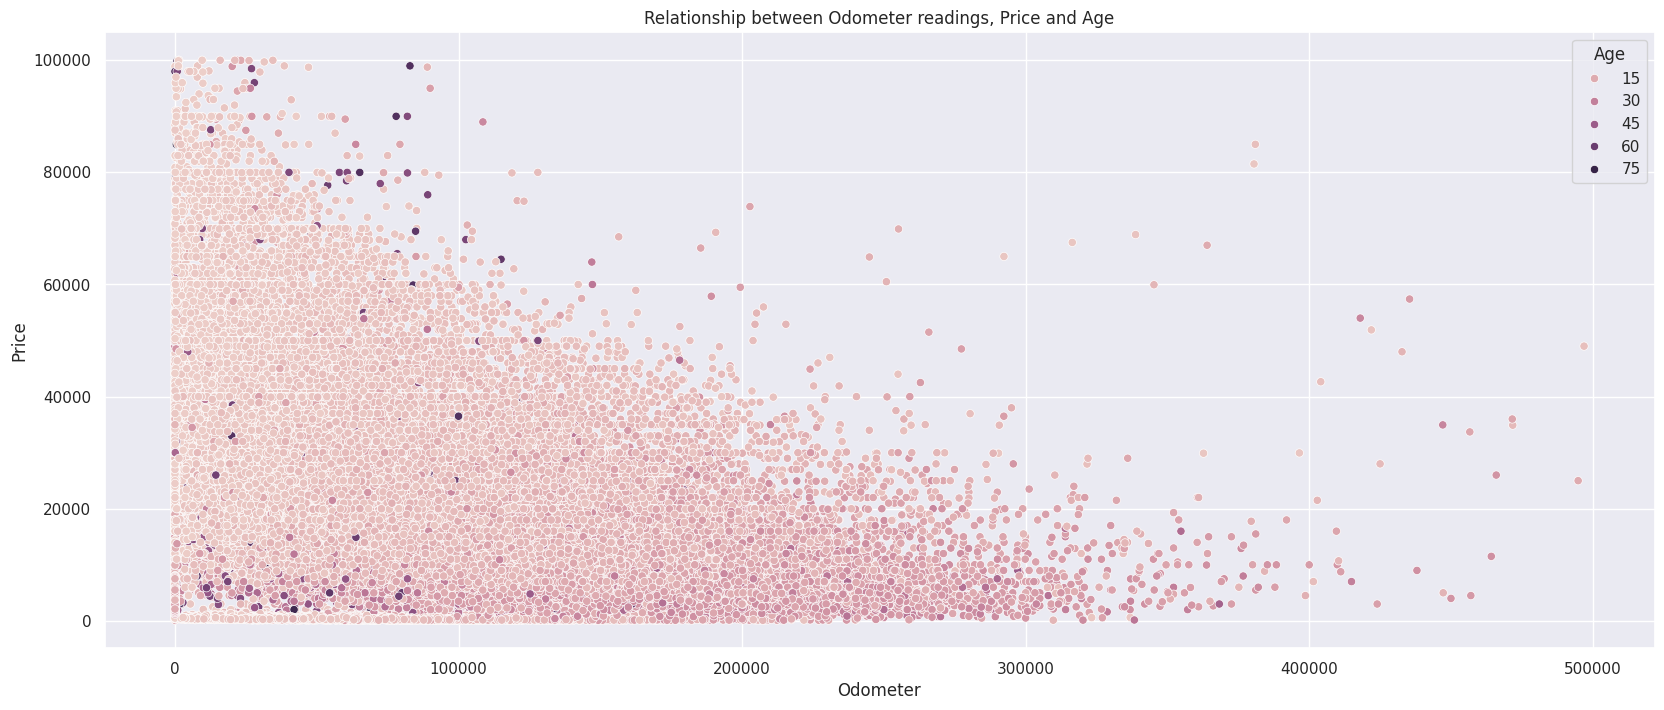

In [38]:
fig = plt.figure(figsize=(20, 8))

fig = sns.scatterplot(data=vehicles, x='Odometer', y='Price', hue='Age')
fig.set(xlabel = 'Odometer', ylabel = 'Price', title = 'Relationship between Odometer readings, Price and Age');

We see that majority of the cars have odometer readings under 300K. Though we see car prices close to 100K, most of the car prices are below 80K.

**Plotting `Top10 Manufaturers` and `Bottom10 Manufaturers` using seaborn barlplot.**

Top10 Manufaturers:
 Manufacturer
Ferrari          65574.273438
Aston-martin     44257.601562
Tesla            41902.550781
Porsche          34939.273438
Ram              30012.873047
Rover            29975.585938
Alfa-romeo       29075.367188
Gmc              25844.292969
Jaguar           22276.158203
Mercedes-benz    21763.585938
Name: Price, dtype: float32
 


<ipython-input-39-64bf6d8fa5a2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(x= top10_model.values, y=top10_model.index, palette='deep')


Bottom10 Manufaturers: 
Manufacturer
Land rover     3574.500000
Saturn         5308.764648
Mercury        5905.213379
Pontiac        8716.126953
Fiat           9929.172852
Chrysler      11629.276367
Mazda         12130.774414
Hyundai       12281.132812
Honda         12353.800781
Volkswagen    13023.402344
Name: Price, dtype: float32


<ipython-input-39-64bf6d8fa5a2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(x= bottom10_model.values, y=bottom10_model.index, palette='deep')


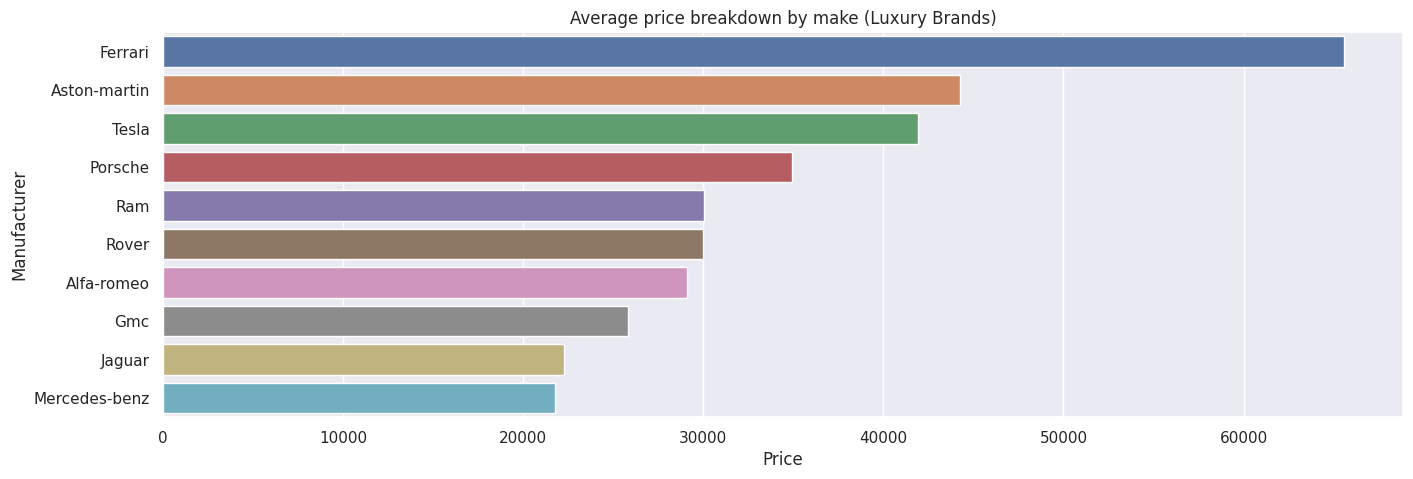

<Figure size 640x480 with 0 Axes>

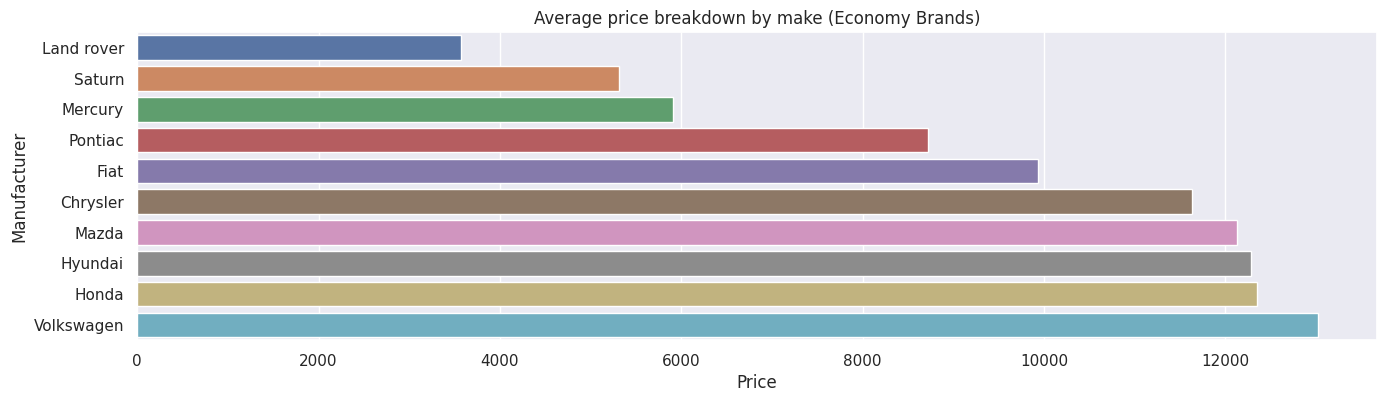

In [39]:
fig = plt.figure(figsize=(16, 5))
top10_model = vehicles.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False).head(10)
print(f'Top10 Manufaturers:\n {top10_model}\n ')
fig = sns.barplot(x= top10_model.values, y=top10_model.index, palette='deep')
fig.set(xlabel = 'Price', ylabel = 'Manufacturer', title = 'Average price breakdown by make (Luxury Brands)');
plt.figure()

fig = plt.figure(figsize=(16, 4))
bottom10_model = vehicles.groupby('Manufacturer')['Price'].mean().sort_values(ascending=True).head(10)
print(f'Bottom10 Manufaturers: \n{bottom10_model}')
fig = sns.barplot(x= bottom10_model.values, y=bottom10_model.index, palette='deep')
fig.set(xlabel = 'Price', ylabel = 'Manufacturer', title = 'Average price breakdown by make (Economy Brands)');


**Plotting `Average price breakdown by Transmission Types` using seaborn barlplot.**

Transmission Types:
 Transmission
other        25689.595703
automatic    17863.736328
manual       15861.042969
Name: Price, dtype: float32
 


<ipython-input-40-79528248e8f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(x= transmission_types.values, y=transmission_types.index, palette='deep')


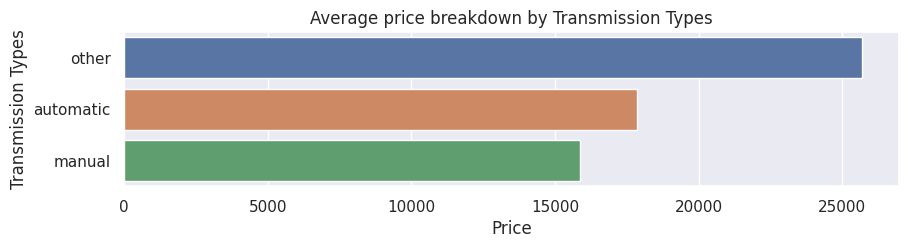

In [40]:
fig = plt.figure(figsize=(10, 2))

transmission_types = vehicles.groupby('Transmission')['Price'].mean().sort_values(ascending=False).head(10)
print(f'Transmission Types:\n {transmission_types}\n ')
fig = sns.barplot(x= transmission_types.values, y=transmission_types.index, palette='deep')
fig.set(xlabel = 'Price', ylabel = 'Transmission Types', title = 'Average price breakdown by Transmission Types');


**Plotting 'Average price breakdown by Fuel type' using seaborn barlplot.**

Fuel :
 Fuel
Diesel      35718.460938
Electric    24259.080078
Other       24206.542969
Gas         17120.128906
Hybrid      14792.853516
Name: Price, dtype: float32
 


<ipython-input-41-28c1f697ad99>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(x= transmission_types.values, y=transmission_types.index, palette='deep')


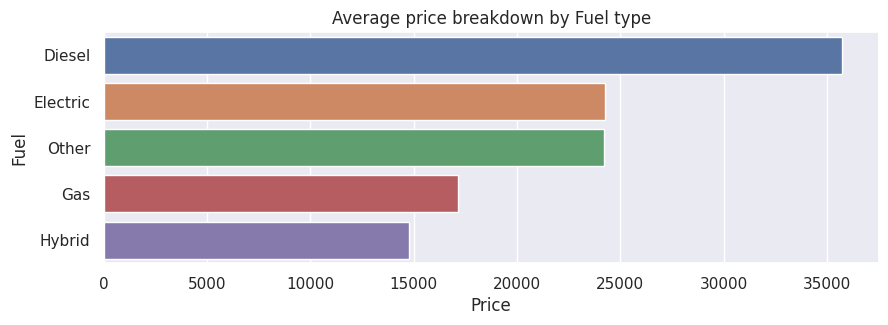

In [41]:
fig = plt.figure(figsize=(10, 3))
transmission_types = vehicles.groupby('Fuel')['Price'].mean().sort_values(ascending=False).head(10)
print(f'Fuel :\n {transmission_types}\n ')
fig = sns.barplot(x= transmission_types.values, y=transmission_types.index, palette='deep')
fig.set(xlabel = 'Price', ylabel = 'Fuel', title = 'Average price breakdown by Fuel type');


**Plotting 'Average price breakdown by Drive type' using seaborn barplot.**

Drive :
 Drive
4WD    23136.623047
RWD    20169.544922
FWD    12256.486328
Name: Price, dtype: float32
 


<ipython-input-42-47a1f1cb5645>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(x= transmission_types.values, y=transmission_types.index, palette='deep')


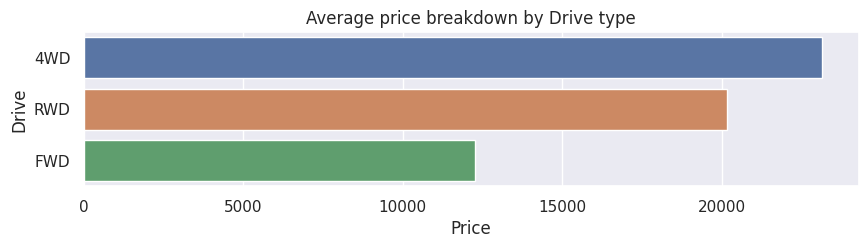

In [42]:
fig = plt.figure(figsize=(10, 2))
transmission_types = vehicles.groupby('Drive')['Price'].mean().sort_values(ascending=False).head(10)
print(f'Drive :\n {transmission_types}\n ')
fig = sns.barplot(x= transmission_types.values, y=transmission_types.index, palette='deep')
fig.set(xlabel = 'Price', ylabel = 'Drive', title = 'Average price breakdown by Drive type');


**Plotting 'Average price breakdown by Car Type' using seaborn barplot.**

Type :
 Type
PICKUP         28439.070312
TRUCK          27812.017578
OTHER          22374.265625
OFFROAD        21741.113281
COUPE          20754.177734
CONVERTIBLE    18674.513672
VAN            18217.226562
SUV            17295.345703
HATCHBACK      13645.006836
WAGON          13565.446289
Name: Price, dtype: float32
 


<ipython-input-43-1a57f16e9cab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(x= transmission_types.values, y=transmission_types.index, palette='deep')


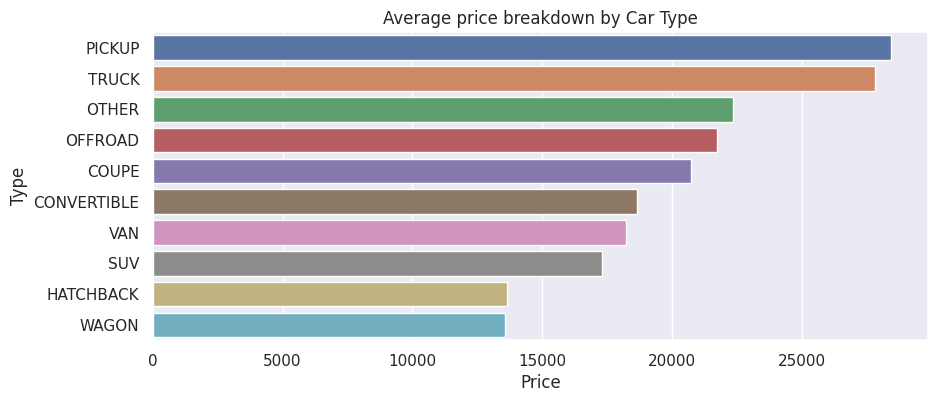

In [43]:
fig = plt.figure(figsize=(10, 4))
transmission_types = vehicles.groupby('Type')['Price'].mean().sort_values(ascending=False).head(10)
print(f'Type :\n {transmission_types}\n ')
fig = sns.barplot(x= transmission_types.values, y=transmission_types.index, palette='deep')
fig.set(xlabel = 'Price', ylabel = 'Type', title = 'Average price breakdown by Car Type');


**Plotting 'Average Type breakdown by Age' using seaborn barplot.**

Age :
 Type
OFFROAD        22.549296
CONVERTIBLE    18.774394
BUS            18.530000
COUPE          14.491219
MINI-VAN       12.840232
WAGON          11.966725
TRUCK          11.671948
PICKUP         11.349663
SEDAN          11.229621
VAN            11.114719
Name: Age, dtype: float64
 


<ipython-input-44-e4fef213b4c6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(x= transmission_types.values, y=transmission_types.index, palette='deep')


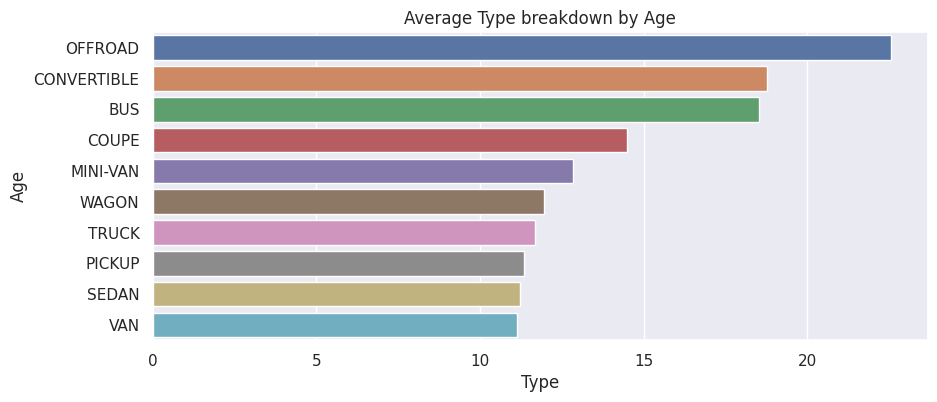

In [44]:
fig = plt.figure(figsize=(10, 4))
transmission_types = vehicles.groupby('Type')['Age'].mean().sort_values(ascending=False).head(10)
print(f'Age :\n {transmission_types}\n ')
fig = sns.barplot(x= transmission_types.values, y=transmission_types.index, palette='deep')
fig.set(xlabel = 'Type', ylabel = 'Age', title = 'Average Type breakdown by Age');


**Plotting 'Price vs Odometer' using seaborn scatterplot.**

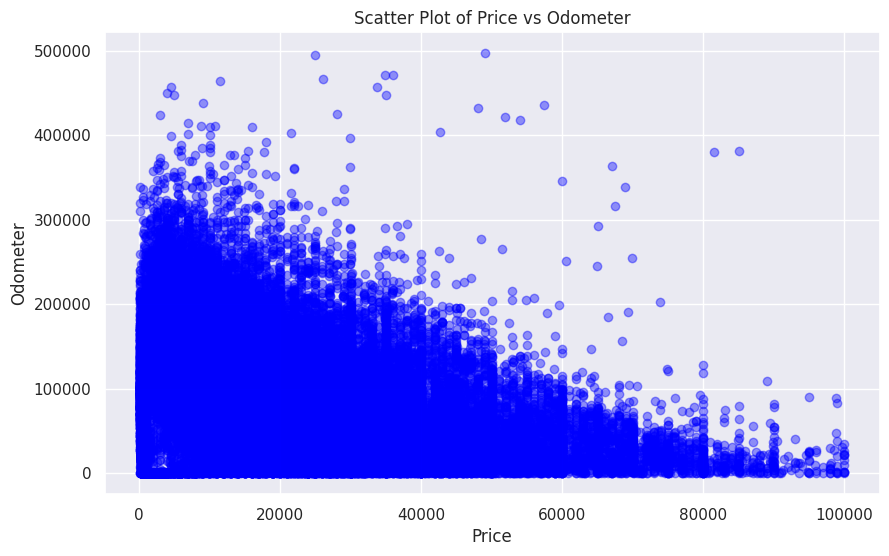

In [45]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(vehicles["Price"], vehicles["Odometer"], color="blue", alpha=0.4)
plt.title("Scatter Plot of Price vs Odometer")
plt.ylabel("Odometer")
plt.xlabel("Price")
plt.grid(True)
plt.show()

Since `age` is a genarated feature from year, we can drop the feature.

In [46]:
vehicles = vehicles.drop(columns='Age', axis=1)

In [47]:
vehicles.columns

Index(['Price', 'Year', 'Manufacturer', 'Condition', 'Cylinders', 'Fuel', 'Odometer',
       'Title_status', 'Transmission', 'Drive', 'Type', 'Paint_color', 'State'],
      dtype='object')

In [48]:
#import the packages required for modeling
import feature_engine
feature_engine.__version__
import category_encoders as ce
from math import sqrt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor, ColumnTransformer
from sklearn.pipeline import make_pipeline
from feature_engine.imputation import RandomSampleImputer
from sklearn.feature_selection import SequentialFeatureSelector

In [49]:
print(f"Total number of records left in the dataset after data cleaning :  {len(vehicles)}")

Total number of records left in the dataset after data cleaning :  103161


## Data Preprocessing

Here, we'll split the data into categorical, ordinal and numerical and treat them with separate scaling, imputing and encoding techniques.
- **StandardScaler** - Standardize features by removing the mean and scaling to unit variance.
- **PolynomialFeatures** - Polynomial Features are created by raising existing features to an exponent.
- **IterativeImputer** - A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.
- **RandomSampleImputer** - The RandomSampleImputer() replaces missing data with a random sample extracted from the variable. It works with both numerical and categorical variables.
- **OneHotEncoder** - Encodes categorical features as a one-hot numeric array.
- **JamesSteinEncoder** - Is a target-based encoder used for Categorical Encoding. It dominates the "ordinary" least squares approach, i.e., it has a lower mean squared error.
- **OrdinalEncoder** - Encode categorical features as an integer array.

We create a Pipeline object that includes the preprocessing steps defined and the model created.
The pipeline automates the entire process of preprocessing the data and training the model, making the workflow more efficient and easier to maintain.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*bWt6NF7_n0-9l_iDFVKS5A.png)

**Define the preprocessing steps.**

We create a **ColumnTransformer** that preprocesses numerical and categorical features separately.
- Numerical features are processed using a pipeline that imputes missing values with the IterativeImputer and scales the data using StandarScaler and run PolynomialFeatures to transform data into new matrix.
- Categorical features are processed using a pipeline that imputes missing values with RandomImputer and encodes JamesSteinEncoder.
- Ordinal features are processed using a pipeline that imputes missing values with RandomImputer and encodes OrdinalEncoder.
- Some categorical features such as `fuel` and `drive` are processed using a pipeline that imputes missing values with RandomImputer and encodes using OneHotEncoder.

In [50]:
# Categorizing the categorical and numerical features
categorical_features = vehicles.select_dtypes(include=['object']).columns
numerical_features = vehicles.select_dtypes(exclude=['object']).columns
print("Catergorical features: ", categorical_features)
print("Numerical features: ",numerical_features)
print("\n\n")
# Classify the ordinal featues
cylinders_category = ['3 cylinders', '4 cylinders', '5 cylinders',  '6 cylinders', '8 cylinders', '10 cylinders', '12 cylinders', ]
condition_category = ['fair', 'good', 'excellent', 'like new', 'new']

numeric_features = vehicles.select_dtypes(include=['int', 'float'])
numerical_features = list(numeric_features.columns)
numerical_features.remove('Price')

transformer1 = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=10, random_state=42)),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias=False))
])

rnd_imputer = RandomSampleImputer(
    #variables=['Manufacturer', 'Fuel', 'Title_status', 'Transmission', 'Drive', 'Type', 'Paint_color', 'State'],
    random_state=10,seed='general',
)
cat_features = vehicles.select_dtypes(exclude=['int', 'float'])
categorical_features = list(cat_features.columns)
ordinal_features = ['Cylinders', 'Condition']
categorical_features.remove(ordinal_features[0])
categorical_features.remove(ordinal_features[1])

transformer2 = Pipeline(steps=[
    ('imputer', rnd_imputer),
    ('encoder', ce.JamesSteinEncoder(return_df=False))
])

ordinal_encoder = OrdinalEncoder(categories=[cylinders_category, condition_category])

transformer3 = Pipeline(steps=[
    ('imputer', rnd_imputer),
    ('encoder', ordinal_encoder)
])

ohe_features = ['Fuel', 'Drive']
ohe_encoder = OneHotEncoder(handle_unknown='ignore')

transformer4 = Pipeline(steps=[
    ('imputer', rnd_imputer),
    ('encoder', ohe_encoder)
])

column_trans = ColumnTransformer(
    transformers=[
       ('numeric', transformer1, numerical_features),
       ('categorical', transformer2, categorical_features),
       ('ordinal', transformer3, ordinal_features),
       ('ohe', transformer4, ohe_features)
    ], remainder='passthrough')
column_trans

Catergorical features:  Index(['Manufacturer', 'Condition', 'Cylinders', 'Fuel', 'Title_status', 'Transmission', 'Drive',
       'Type', 'Paint_color', 'State'],
      dtype='object')
Numerical features:  Index(['Price', 'Year', 'Odometer'], dtype='object')





ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  IterativeImputer(random_state=42)),
                                                 ('scaler', StandardScaler()),
                                                 ('poly',
                                                  PolynomialFeatures(degree=1,
                                                                     include_bias=False))]),
                                 ['Year', 'Odometer']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  RandomSampleImputer(random_state=10)),
                                                 ('encoder',
                                                  JamesSteinEncoder(retu...
                                                  OrdinalEncoder(categories=[['3 '
                                                                              'cylinders',
                                                                              '4 '
                                                                              'cylinders',
                                                                              '5 '
                                                                              'cylinders',
                                                                              '6 '
                                                                              'cylinders',
                                                                              '8 '
                                                                              'cylinders',
                                                                              '10 '
                                                                              'cylinders',
                                                                              '12 '
                                                                              'cylinders'],
                                                                             ['fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new']]))]),
                                 ['Cylinders', 'Condition']),
                                ('ohe',
                                 Pipeline(steps=[('imputer',
                                                  RandomSampleImputer(random_state=10)),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Fuel', 'Drive'])])

## Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [51]:
#place holder for best model results for each model that we are testing
model_results = {'regressor': [], 'method': [], 'grid_params':[], 'train_mse': [], 'test_mse': [], 'train_rmse': [], 'test_rmse': [], 'r_squared':[]}

Helper function to write the model results upon execution.

In [52]:
def update_results(regressor, method, params, train_mse, test_mse, train_rmse, test_rmse, r_2):
  model_results['regressor'].append(regressor)
  model_results['method'].append(method)
  model_results['grid_params'].append(params)
  model_results['train_mse'].append(train_mse)
  model_results['test_mse'].append(test_mse)
  model_results['train_rmse'].append(train_rmse)
  model_results['test_rmse'].append(test_rmse)
  model_results['r_squared'].append(r_2)


  df_model_results = pd.DataFrame(model_results)

  print(f'Model and results:\n\n {df_model_results}')

### **Ridge Model**

Ridge regression is a model-tuning method that is used to analyze any data that suffers from multicollinearity. This method performs L2 regularization.

In [53]:
pipe = Pipeline([
    ('preprocess', column_trans),
    ('ridge', Ridge())
    ])

pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=42)),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1,
                                                                                      include_bias=False))]),
                                                  ['Year', 'Odometer']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   RandomSampleImputer(random_state=10)),
                                                                  ('e...
                                                                   OrdinalEncoder(categories=[['3 '
                                                                                               'cylinders',
                                                                                               '4 '
                                                                                               'cylinders',
                                                                                               '5 '
                                                                                               'cylinders',
                                                                                               '6 '
                                                                                               'cylinders',
                                                                                               '8 '
                                                                                               'cylinders',
                                                                                               '10 '
                                                                                               'cylinders',
                                                                                               '12 '
                                                                                               'cylinders'],
                                                                                              ['fair',
                                                                                               'good',
                                                                                               'excellent',
                                                                                               'like '
                                                                                               'new',
                                                                                               'new']]))]),
                                                  ['Cylinders', 'Condition']),
                                                 ('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   RandomSampleImputer(random_state=10)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Fuel', 'Drive'])])),
                ('ridge', Ridge())])

**Perform cross-validation using KFold**.

We perform cross-validation using the KFold method, which splits the training data into K folds.
The model is trained K times, using K-1 folds for training and one fold for validation. This gives a more robust estimate of the model’s performance. Her, we'll be performing K-FOLD for cv=5.


In [54]:
param_grid = {
  'ridge__alpha': np.logspace(-1, 6, 1),
  'preprocess__numeric__poly__degree': range(1,4)
}
CV_VALUE=5
grid_ridge = GridSearchCV(estimator=pipe,
                    param_grid=param_grid, scoring = 'neg_mean_squared_error', verbose=True, n_jobs=-1, cv=CV_VALUE, error_score='raise')

grid_ridge

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(random_state=42)),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(degree=1,
                                                                                                             include_bias=False))]),
                                                                         ['Year',
                                                                          'Odometer']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('im...
                                                                                                                      'new',
                                                                                                                      'new']]))]),
                                                                         ['Cylinders',
                                                                          'Condition']),
                                                                        ('ohe',
                                                                         Pipeline(steps=[('imputer',
                                                                                          RandomSampleImputer(random_state=10)),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Fuel',
                                                                          'Drive'])])),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'preprocess__numeric__poly__degree': range(1, 4),
                         'ridge__alpha': array([0.1])},
             scoring='neg_mean_squared_error', verbose=True)

We separate the dataset into input features (X) and the target label (y). The input features are the independent variables that the model will use to make predictions, while the target label is the `Price` column.

You split the data into training and testing sets using the train_test_split function from scikit-learn. This ensures that you have separate data for training the model and evaluating its performance.

In [55]:
#preparing data for modeling
y = vehicles['Price']

X = vehicles.drop(columns=['Price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.dtypes
y_train = y_train.ravel()

# X_test has nan values - we will have to impute them as similar to X_train
# numerical nans values were dropped before, so we will impute categorical
# values similar to how they are imputed in the pre processing
X_test = rnd_imputer.fit_transform(X_test)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train: (82528, 12)
Shape of y_train: (82528,)


Helper function to get the model results - `train_mse`, `test_mse`, `r2`, `best_model`, `best_params`.

In [56]:
def run_grid(grid, X_train, y_train):
  grid.fit(X_train, y_train)

  best_model = grid.best_estimator_
  train_preds = best_model.predict(X_train)
  test_preds = best_model.predict(X_test)
  train_mse = mean_squared_error(y_train, train_preds)
  test_mse = mean_squared_error(y_test, test_preds)
  r2 = r2_score(y_test, test_preds)
  best_params = grid.best_params_
  return train_mse, test_mse, r2, best_model, best_params

We evaluate the performance of the optimized model on the test set using the same performance metrics as before (`MSE`, `RMSE` and `R-Squared`). This allows you to compare the performance of the optimized model with the initial model.

The approch we'll be following is to try different models and evualate the performance of each model using Test MSE, Test RMSE and R-Squared.

**Mean Squared Error** represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

![](https://imgur.com/qQIdcSm.png)

**Root Mean Squared Error** is the square root of Mean Squared error. It measures the standard deviation of residuals.

![](https://imgur.com/sdRzm6F.png)


The coefficient of determination or **R-squared** represents the proportion of the variance in the dependent variable which is explained by the linear regression model. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.

![](https://imgur.com/HOb7XAQ.png)

The cleaned data was divided into target and feature (X and y), and then split into training and test data. I've used a **GridSearchCV and K-FOLD cross-validation on all models** along with **Pipelines**. GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. **K-FOLD** splits the dataset into k consecutive folds (without shuffling by default). Machine learning **pipelines** are iterative as every step is repeated to continuously improve the accuracy of the model and achieve a successful algorithm.

```
sklearn.model_selection.GridSearchCV(estimator, param_grid,scoring=None,
          n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0,
          pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
```







In [57]:
train_mse, test_mse, r2, best_model, best_params = run_grid(grid_ridge, X_train, y_train)
print(f'Train MSE using GridSearchCV using Ridge: {train_mse}')
print(f'Test MSE using GridSearchCV using Ridge: {test_mse}')
print(f'R-squared score using GridSearchCV using Ridge: {r2}\n')
print(f'Test RMSE using GridSearchCV using Ridge : {sqrt(train_mse)}')
print(f'Test RMSE using GridSearchCV using Ridge : {sqrt(test_mse)}\n')
print(f'Best params using GridSearchCV using Ridge: {best_params}')

update_results('ridge', 'Ridge', best_params, train_mse, test_mse, sqrt(train_mse), sqrt(test_mse), r2)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train MSE using GridSearchCV using Ridge: 81911437.96446654
Test MSE using GridSearchCV using Ridge: 78075543.8583543
R-squared score using GridSearchCV using Ridge: 0.5919519429332847

Test RMSE using GridSearchCV using Ridge : 9050.493796719964
Test RMSE using GridSearchCV using Ridge : 8836.036660084334

Best params using GridSearchCV using Ridge: {'preprocess__numeric__poly__degree': 3, 'ridge__alpha': 0.1}
Model and results:

   regressor method                                        grid_params     train_mse      test_mse  \
0     ridge  Ridge  {'preprocess__numeric__poly__degree': 3, 'ridg...  8.191144e+07  7.807554e+07   

    train_rmse   test_rmse  r_squared  
0  9050.493797  8836.03666   0.591952  


Ridge Regression model gives a r-squared valued of `0.591952` and test RMSE of `8836.03666`.

## Feature Importance

This will help evaluate the best features for the model. **Permutation feature importance** is a model inspection technique that measures the contribution of each feature to a fitted model’s statistical performance on a given tabular dataset.

In [58]:
from sklearn.inspection import permutation_importance
r = permutation_importance(best_model, X, y,
                            n_repeats=10,
                            random_state=0)
parameters = {'feature': [], 'importance_mean': [], 'importance_std': []}
for i in r.importances_mean.argsort()[::-1]:
    print(f"{X.columns.tolist()[i]:<8} "
          f"{r.importances_mean[i]:.3f}"
          f" +/- {r.importances_std[i]:.3f}")
    parameters['feature'].append(X.columns.tolist()[i])
    parameters['importance_mean'].append(r.importances_mean[i])
    parameters['importance_std'].append(r.importances_std[i])

importance_df = pd.DataFrame(parameters)
importance_df.head(10)

Year     0.297 +/- 0.002
Odometer 0.120 +/- 0.001
Fuel     0.086 +/- 0.001
Type     0.047 +/- 0.000
Manufacturer 0.039 +/- 0.001
Drive    0.032 +/- 0.000
Cylinders 0.022 +/- 0.001
State    0.012 +/- 0.000
Title_status 0.005 +/- 0.000
Paint_color 0.001 +/- 0.000
Condition 0.000 +/- 0.000
Transmission 0.000 +/- 0.000


,feature,importance_mean,importance_std
0,Year,0.296632,0.001906
1,Odometer,0.119522,0.000720
2,Fuel,0.085815,0.000933
3,Type,0.047438,0.000478
4,Manufacturer,0.039025,0.000618
5,Drive,0.032371,0.000429
6,Cylinders,0.021696,0.000615
7,State,0.012126,0.000261
8,Title_status,0.004639,0.000122
9,Paint_color,0.000815,0.000084


Ploting the feature importance using a bar plot.

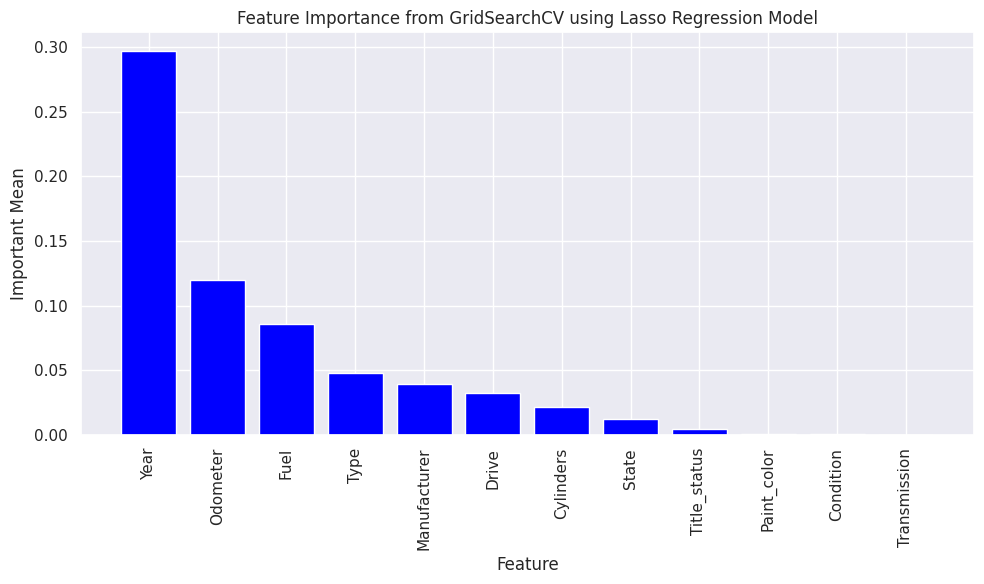

In [59]:
# Plot the feature importance as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(importance_df["feature"], importance_df["importance_mean"], color='blue')
plt.xlabel("Feature")
plt.ylabel("Important Mean")
plt.title("Feature Importance from GridSearchCV using Lasso Regression Model")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

For `Ridge` model, the best features are **`Year`**,**`Odometer`** and **`Fuel`**.
Let's calculate the co-efficeints for different features for ridge regression. Since, we need to know only the first few coeffecients, so limiting the threshold value as 0.08.

In [60]:
feature_names = best_model.named_steps['preprocess'].get_feature_names_out()
coeffs = best_model.named_steps['ridge'].coef_

df_coefs = pd.DataFrame({
  'features': feature_names,
  'coeffs': coeffs
})

df_coefs_sorted = df_coefs[abs(df_coefs['coeffs']) > 0.08].sort_values(by='coeffs', ascending=False, key=abs)
df_coefs_sorted.head(10)

,features,coeffs
0,numeric__Year,7249.873049
1,numeric__Odometer,-3465.662740
20,ohe__Fuel_Electric,-3298.472746
19,ohe__Fuel_Diesel,2943.198556
23,ohe__Fuel_Other,-2802.856057
22,ohe__Fuel_Hybrid,2496.666522
2,numeric__Year^2,2143.972727
17,ordinal__Cylinders,1164.898817
3,numeric__Year Odometer,-713.489860
21,ohe__Fuel_Gas,661.463719


We see that `Year`, `Odometer` and `Fuel` have the best coefficients.

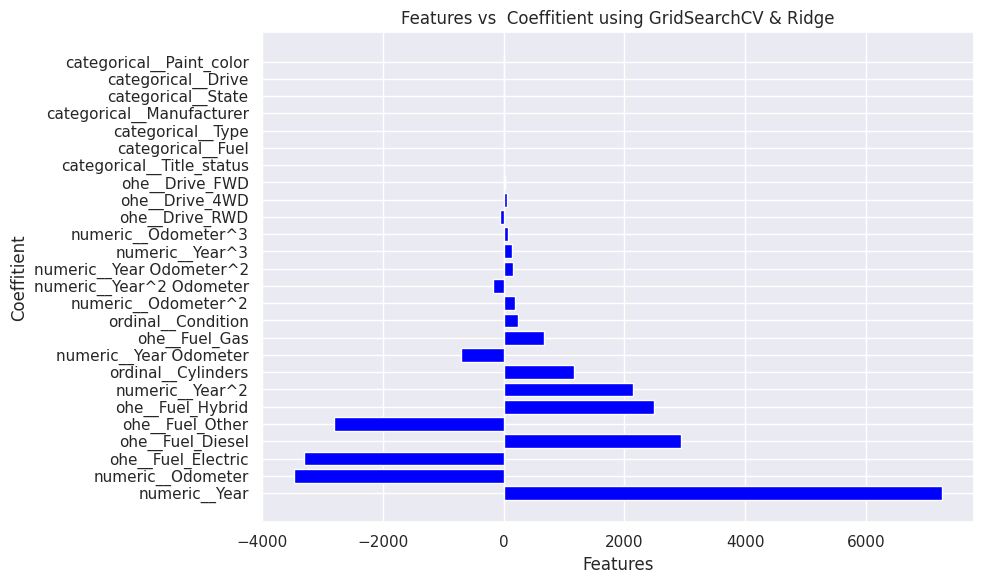

In [61]:
# Plot the feature importance as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_coefs_sorted["features"], df_coefs_sorted["coeffs"], color='blue')
plt.xlabel("Features")
plt.ylabel("Coeffitient")
plt.title("Features vs  Coeffitient using GridSearchCV & Ridge")
# plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### **Lasso Model**

Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean.

In [62]:
pipe = Pipeline([
    ('preprocess', column_trans),
    ('lasso', Lasso())
])

pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=42)),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1,
                                                                                      include_bias=False))]),
                                                  ['Year', 'Odometer']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   RandomSampleImputer(random_state=10)),
                                                                  ('e...
                                                                   OrdinalEncoder(categories=[['3 '
                                                                                               'cylinders',
                                                                                               '4 '
                                                                                               'cylinders',
                                                                                               '5 '
                                                                                               'cylinders',
                                                                                               '6 '
                                                                                               'cylinders',
                                                                                               '8 '
                                                                                               'cylinders',
                                                                                               '10 '
                                                                                               'cylinders',
                                                                                               '12 '
                                                                                               'cylinders'],
                                                                                              ['fair',
                                                                                               'good',
                                                                                               'excellent',
                                                                                               'like '
                                                                                               'new',
                                                                                               'new']]))]),
                                                  ['Cylinders', 'Condition']),
                                                 ('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   RandomSampleImputer(random_state=10)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Fuel', 'Drive'])])),
                ('lasso', Lasso())])

In [63]:
param_grid = {
  'lasso__alpha': np.logspace(-1, 5, 1),
  'lasso__max_iter': [100],
  'preprocess__numeric__poly__degree': [1, 2, 3]
}
grid_lasso = GridSearchCV(estimator=pipe,
                    param_grid=param_grid, scoring = 'neg_mean_squared_error', verbose=True, n_jobs=-1, cv=5, error_score='raise')

train_mse, test_mse, r2, best_model, best_params = run_grid(grid_lasso, X_train, y_train)
print(f'Train MSE using GridSearchCV using Lasso Regression: {train_mse}')
print(f'Test MSE using GridSearchCV using Lasso Regression: {test_mse}')
print(f'R-squared score using GridSearchCV using Lasso Regression: {r2} \n')
print(f'\n Test RMSE using GridSearchCV using Lasso Regression: {sqrt(train_mse)}')
print(f'Test RMSE using GridSearchCV using Lasso Regression: {sqrt(test_mse)}')
print(f'\n Best params using GridSearchCV using Lasso Regression: {best_params}')

update_results('lasso', 'Lasso', best_params, train_mse, test_mse, sqrt(train_mse), sqrt(test_mse), r2)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.380e+12, tolerance: 1.602e+09
  model = cd_fast.enet_coordinate_descent(


Train MSE using GridSearchCV using Lasso Regression: 81912010.5122562
Test MSE using GridSearchCV using Lasso Regression: 78075980.58343707
R-squared score using GridSearchCV using Lasso Regression: 0.5919496604666801 


 Test RMSE using GridSearchCV using Lasso Regression: 9050.525427413384
Test RMSE using GridSearchCV using Lasso Regression: 8836.061372774471

 Best params using GridSearchCV using Lasso Regression: {'lasso__alpha': 0.1, 'lasso__max_iter': 100, 'preprocess__numeric__poly__degree': 3}
Model and results:

   regressor method                                        grid_params     train_mse      test_mse  \
0     ridge  Ridge  {'preprocess__numeric__poly__degree': 3, 'ridg...  8.191144e+07  7.807554e+07   
1     lasso  Lasso  {'lasso__alpha': 0.1, 'lasso__max_iter': 100, ...  8.191201e+07  7.807598e+07   

    train_rmse    test_rmse  r_squared  
0  9050.493797  8836.036660   0.591952  
1  9050.525427  8836.061373   0.591950  


Lasso Regression model gives a r-squared valued of `0.591950` and test RMSE of `8836.061373`. Permutation feature importance is a model inspection technique that measures the contribution of each feature to a fitted model’s statistical performance on a given tabular dataset.

In [64]:
from sklearn.inspection import permutation_importance
r = permutation_importance(best_model, X, y,
                            n_repeats=10,
                            random_state=0)
parameters = {'feature': [], 'importance_mean': [], 'importance_std': []}
for i in r.importances_mean.argsort()[::-1]:
    print(f"{X.columns.tolist()[i]:<8} "
          f"{r.importances_mean[i]:.3f}"
          f" +/- {r.importances_std[i]:.3f}")
    parameters['feature'].append(X.columns.tolist()[i])
    parameters['importance_mean'].append(r.importances_mean[i])
    parameters['importance_std'].append(r.importances_std[i])

importance_df = pd.DataFrame(parameters)
importance_df.head(10)

Year     0.295 +/- 0.002
Odometer 0.121 +/- 0.001
Fuel     0.086 +/- 0.001
Type     0.048 +/- 0.000
Manufacturer 0.039 +/- 0.001
Drive    0.032 +/- 0.000
Cylinders 0.022 +/- 0.001
State    0.012 +/- 0.000
Title_status 0.005 +/- 0.000
Paint_color 0.001 +/- 0.000
Condition 0.000 +/- 0.000
Transmission 0.000 +/- 0.000


,feature,importance_mean,importance_std
0,Year,0.294573,0.001899
1,Odometer,0.121009,0.000728
2,Fuel,0.085856,0.000933
3,Type,0.047523,0.000479
4,Manufacturer,0.039045,0.000619
5,Drive,0.032383,0.000430
6,Cylinders,0.021668,0.000614
7,State,0.012141,0.000261
8,Title_status,0.004645,0.000122
9,Paint_color,0.000821,0.000084


Ploting the feature importance using a bar plot.

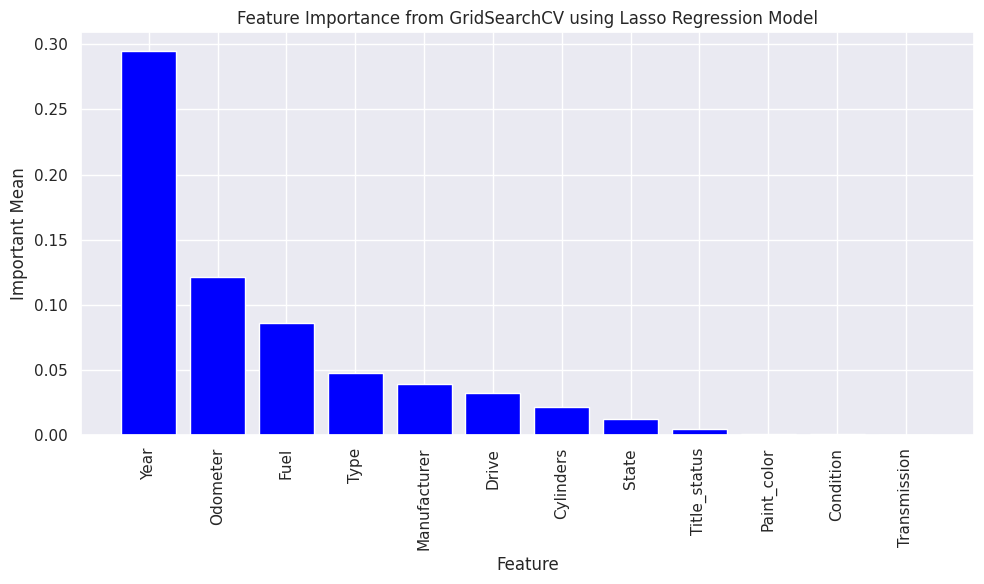

In [65]:
# Plot the feature importance as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(importance_df["feature"], importance_df["importance_mean"], color='blue')
plt.xlabel("Feature")
plt.ylabel("Important Mean")
plt.title("Feature Importance from GridSearchCV using Lasso Regression Model")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

For Lasso model, the best features are `Year`, `Odometer` and `Fuel`. Let's calculate the co-efficeints for different features for lasso regression. Since, we need to know only the first few coeffecients, so limiting the threshold value as `0.0005`.

In [66]:
feature_names = best_model.named_steps['preprocess'].get_feature_names_out()
coeffs = best_model.named_steps['lasso'].coef_

df_coefs = pd.DataFrame({
  'features': feature_names,
  'coeffs': coeffs
})

df_coefs_sorted = df_coefs[abs(df_coefs['coeffs']) > 0.0005].sort_values(by='coeffs', ascending=False, key=abs)
df_coefs_sorted.head(10)

,features,coeffs
0,numeric__Year,7210.463540
22,ohe__Fuel_Hybrid,5838.441902
20,ohe__Fuel_Electric,-3969.362839
23,ohe__Fuel_Other,-3521.688388
1,numeric__Odometer,-3485.314083
21,ohe__Fuel_Gas,3030.339648
2,numeric__Year^2,2114.105568
19,ohe__Fuel_Diesel,-1886.928061
24,ohe__Drive_4WD,-1676.265851
17,ordinal__Cylinders,1164.175530


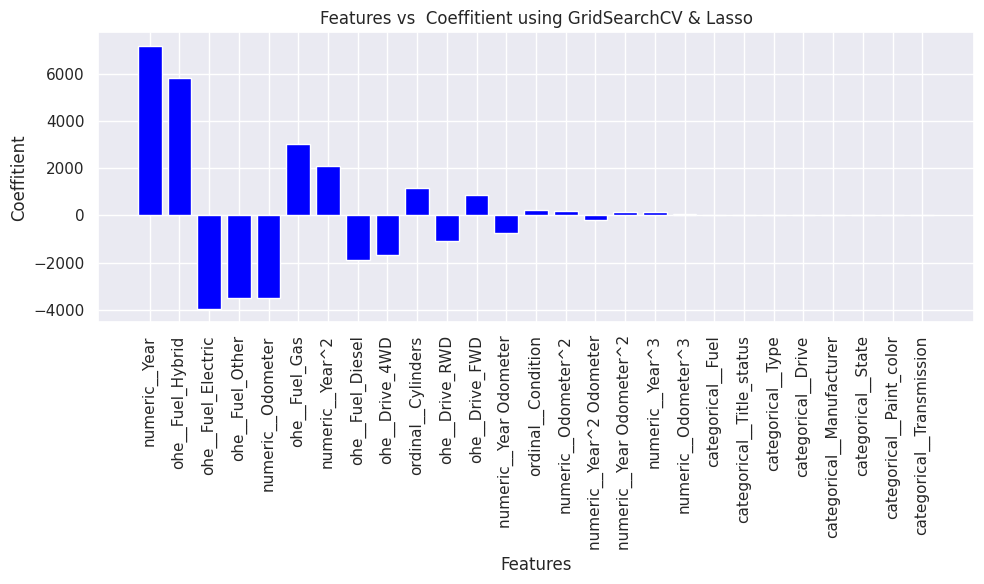

In [67]:
# Plot the feature importance as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_coefs_sorted["features"], df_coefs_sorted["coeffs"], color='blue')
plt.xlabel("Features")
plt.ylabel("Coeffitient")
plt.title("Features vs  Coeffitient using GridSearchCV & Lasso")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

### **Linear Regression Model**

Linear regression is a modeling technique that helps in building relationships between a dependent scalar variable and one or more independent variables. It attempts to model the relationship between two variables by fitting a linear equation to observed data.

In [68]:
pipe = Pipeline([
    ('preprocess', column_trans),
    #('regressor', TransformedTargetRegressor(regressor=LinearRegression(), func=np.log, inverse_func=np.exp))
    ('lr', LinearRegression())
])

pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=42)),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1,
                                                                                      include_bias=False))]),
                                                  ['Year', 'Odometer']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   RandomSampleImputer(random_state=10)),
                                                                  ('e...
                                                                                               'cylinders',
                                                                                               '4 '
                                                                                               'cylinders',
                                                                                               '5 '
                                                                                               'cylinders',
                                                                                               '6 '
                                                                                               'cylinders',
                                                                                               '8 '
                                                                                               'cylinders',
                                                                                               '10 '
                                                                                               'cylinders',
                                                                                               '12 '
                                                                                               'cylinders'],
                                                                                              ['fair',
                                                                                               'good',
                                                                                               'excellent',
                                                                                               'like '
                                                                                               'new',
                                                                                               'new']]))]),
                                                  ['Cylinders', 'Condition']),
                                                 ('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   RandomSampleImputer(random_state=10)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Fuel', 'Drive'])])),
                ('lr', LinearRegression())])

In [69]:
param_grid = {
    'preprocess__numeric__poly__degree': [8, 9]
}

grid_linear = GridSearchCV(estimator=pipe,
                    param_grid=param_grid, scoring = 'neg_mean_squared_error', verbose=True, n_jobs=-1, cv=5, error_score='raise')


train_mse, test_mse, r2, best_model, best_params = run_grid(grid_linear, X_train, y_train)
print(f'Train MSE using GridSearchCV using Linear Regression: {train_mse}')
print(f'Test MSE using GridSearchCV using Linear Regression: {test_mse}')
print(f'R-squared score using GridSearchCV using Linear Regression: {r2}\n')
print(f'Test RMSE using GridSearchCV using Linear Regression: {sqrt(train_mse)}')
print(f'Test RMSE using GridSearchCV using Linear Regression: {sqrt(test_mse)}\n')
print(f'Best params using GridSearchCV using Linear Regression: {best_params}')

model_result = update_results('lr', 'LinearRegression', best_params, train_mse, test_mse, sqrt(train_mse), sqrt(test_mse), r2)
model_result

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Train MSE using GridSearchCV using Linear Regression: 80404366.1840685
Test MSE using GridSearchCV using Linear Regression: 81601888.20081091
R-squared score using GridSearchCV using Linear Regression: 0.5735221262918774

Test RMSE using GridSearchCV using Linear Regression: 8966.848174474044
Test RMSE using GridSearchCV using Linear Regression: 9033.37634557594

Best params using GridSearchCV using Linear Regression: {'preprocess__numeric__poly__degree': 9}
Model and results:

   regressor            method                                        grid_params     train_mse  \
0     ridge             Ridge  {'preprocess__numeric__poly__degree': 3, 'ridg...  8.191144e+07   
1     lasso             Lasso  {'lasso__alpha': 0.1, 'lasso__max_iter': 100, ...  8.191201e+07   
2        lr  LinearRegression           {'preprocess__numeric__poly__degree': 9}  8.040437e+07   

       test_mse   train_rmse    test_rmse  r_squared  
0  7.807

Linear regression model gives a r-squared valued of `0.573522` and test RMSE of `9033.376346`.

In [70]:
from sklearn.inspection import permutation_importance
r = permutation_importance(best_model, X, y,
                            n_repeats=10,
                            random_state=0)
parameters = {'feature': [], 'importance_mean': [], 'importance_std': []}
for i in r.importances_mean.argsort()[::-1]:
    print(f"{X.columns.tolist()[i]:<8} "
          f"{r.importances_mean[i]:.3f}"
          f" +/- {r.importances_std[i]:.3f}")
    parameters['feature'].append(X.columns.tolist()[i])
    parameters['importance_mean'].append(r.importances_mean[i])
    parameters['importance_std'].append(r.importances_std[i])

importance_df = pd.DataFrame(parameters)
importance_df.head(10)

Year     175.979 +/- 273.163
Odometer 152.849 +/- 329.539
Fuel     0.085 +/- 0.001
Type     0.047 +/- 0.000
Manufacturer 0.038 +/- 0.001
Drive    0.033 +/- 0.000
Cylinders 0.021 +/- 0.001
State    0.012 +/- 0.000
Title_status 0.005 +/- 0.000
Paint_color 0.001 +/- 0.000
Condition 0.000 +/- 0.000
Transmission 0.000 +/- 0.000


,feature,importance_mean,importance_std
0,Year,175.979216,273.163281
1,Odometer,152.849076,329.538586
2,Fuel,0.085375,0.001032
3,Type,0.047194,0.000416
4,Manufacturer,0.038393,0.000569
5,Drive,0.032582,0.000429
6,Cylinders,0.020941,0.000593
7,State,0.011578,0.000199
8,Title_status,0.004835,0.000118
9,Paint_color,0.000852,0.000078


Ploting the feature importance using a bar plot.

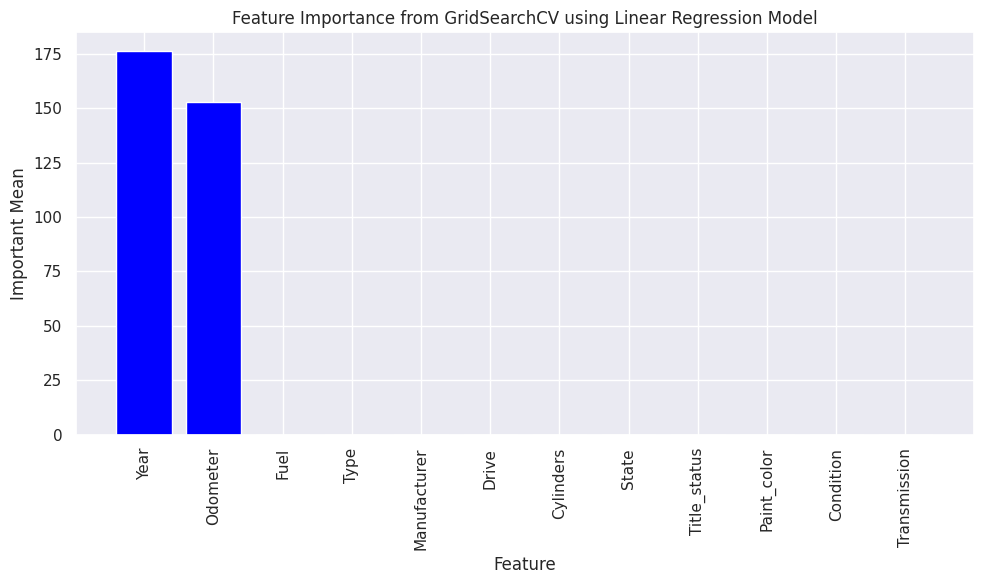

In [71]:
# Plot the feature importance as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(importance_df["feature"], importance_df["importance_mean"], color='blue')
plt.xlabel("Feature")
plt.ylabel("Important Mean")
plt.title("Feature Importance from GridSearchCV using Linear Regression Model")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

For Linear regression model, the best features are `Year`and `Odometer` . Let's calculate the co-efficeints for different features for Linear regression. Since, we need to know only the first few coeffecients, so limiting the threshold value as 0.00001.

In [72]:
feature_names = best_model.named_steps['preprocess'].get_feature_names_out()
coeffs = best_model.named_steps['lr'].coef_

df_coefs = pd.DataFrame({
  'features': feature_names,
  'coeffs': coeffs
})

df_coefs_sorted = df_coefs[abs(df_coefs['coeffs']) > 0.00001].sort_values(by='coeffs', ascending=False, key=abs)
df_coefs_sorted.head(10)

,features,coeffs
0,numeric__Year,6948.440707
7,numeric__Year Odometer^2,-4573.697586
65,ohe__Fuel_Electric,-3314.337262
1,numeric__Odometer,-3257.593619
64,ohe__Fuel_Diesel,2962.269931
68,ohe__Fuel_Other,-2825.773984
8,numeric__Odometer^3,-2670.433810
67,ohe__Fuel_Hybrid,2515.029250
4,numeric__Odometer^2,2312.597855
3,numeric__Year Odometer,2291.444628


We see that `Year`, `Odometer` and `Fuel` have the best coefficients.

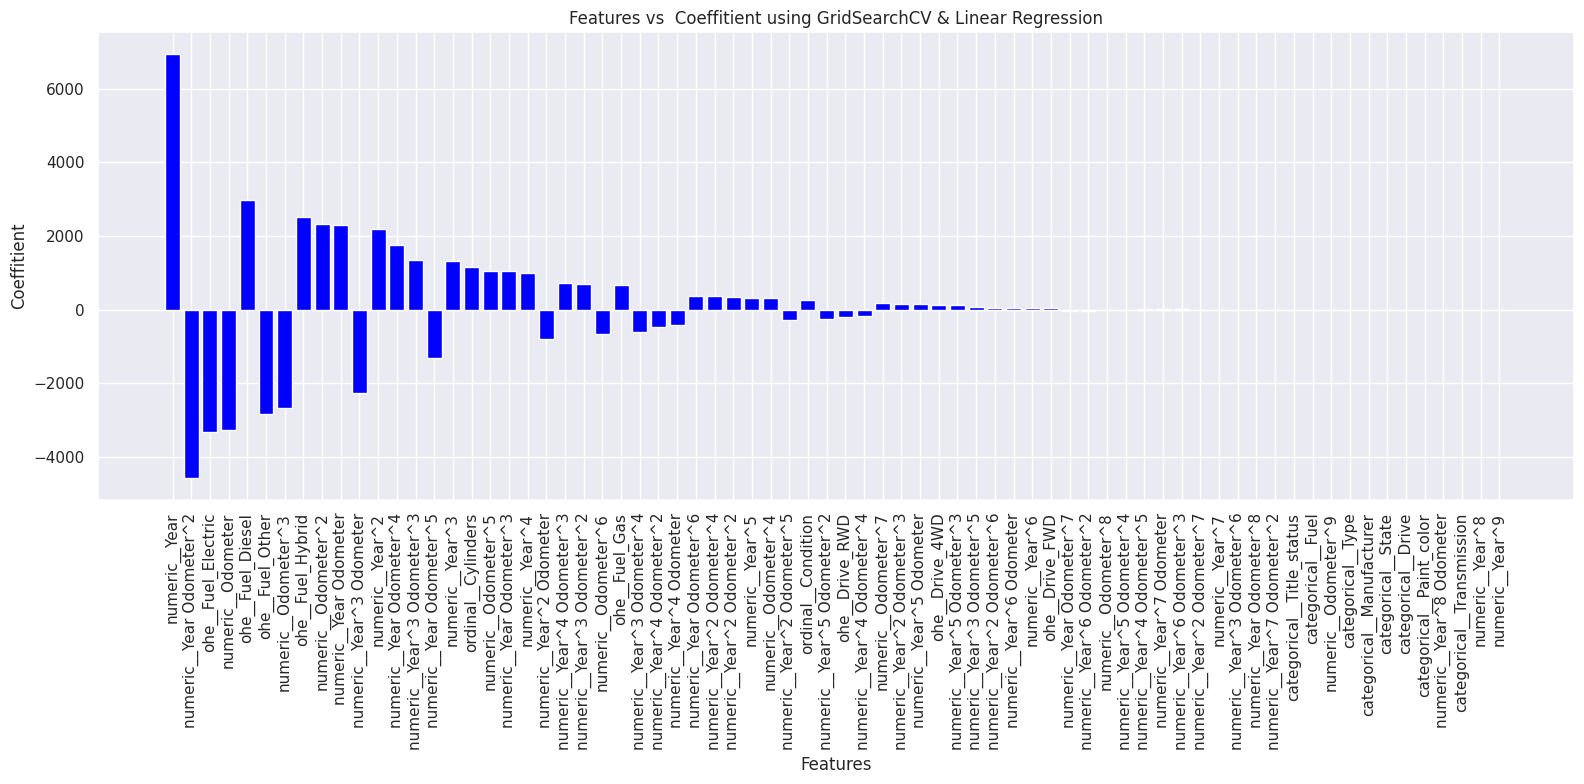

In [73]:
# Plot the feature importance as a bar chart
plt.figure(figsize=(16, 8))
plt.bar(df_coefs_sorted["features"], df_coefs_sorted["coeffs"], color='blue')
plt.xlabel("Features")
plt.ylabel("Coeffitient")
plt.title("Features vs  Coeffitient using GridSearchCV & Linear Regression")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

### **Linear Regression Model using TransformedTargetRegressor**

TransformedTargetRegressor(TTR) is applied over the Linear regression model. TTR is used where a numerical value must be predicted, it can also be critical to scale and perform other data transformations on the target variable.

In [74]:
pipe = Pipeline([
    ('preprocess', column_trans),
    ('lr', TransformedTargetRegressor(regressor=LinearRegression(), func=np.log, inverse_func=np.exp))
])

pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=42)),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1,
                                                                                      include_bias=False))]),
                                                  ['Year', 'Odometer']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   RandomSampleImputer(random_state=10)),
                                                                  ('e...
                                                                                               '12 '
                                                                                               'cylinders'],
                                                                                              ['fair',
                                                                                               'good',
                                                                                               'excellent',
                                                                                               'like '
                                                                                               'new',
                                                                                               'new']]))]),
                                                  ['Cylinders', 'Condition']),
                                                 ('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   RandomSampleImputer(random_state=10)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Fuel', 'Drive'])])),
                ('lr',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=LinearRegression()))])

In [75]:
param_grid = {
  'preprocess__numeric__poly__degree': range(1,4),
}
grid_lr = GridSearchCV(estimator=pipe,
                    param_grid=param_grid, scoring = 'neg_mean_squared_error', verbose=True, n_jobs=-1, cv=5, error_score='raise')

train_mse, test_mse, r2, best_model, best_params = run_grid(grid_lr, X_train, y_train)
print(f'Train MSE using GridSearchCV using TransformedTargetRegressor-Linear Regression: {train_mse}')
print(f'Test MSE using GridSearchCV using TransformedTargetRegressor-Linear Regression: {test_mse}')
print(f'R-squared score using GridSearchCV using TransformedTargetRegressor-Linear Regression: {r2} \n')
print(f'Test RMSE using GridSearchCV using TransformedTargetRegressor-Linear Regression: {sqrt(train_mse)}')
print(f'Test RMSE using GridSearchCV using TransformedTargetRegressor-Linear Regression: {sqrt(test_mse)}\n')
print(f'Best params using GridSearchCV using TransformedTargetRegressor-Linear Regression: {best_params}')

update_results('lr', 'LinearRegression with TTR', best_params, train_mse, test_mse, sqrt(train_mse), sqrt(test_mse), r2)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_function_transformer.py:190: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


Train MSE using GridSearchCV using TransformedTargetRegressor-Linear Regression: 94540891.10131536
Test MSE using GridSearchCV using TransformedTargetRegressor-Linear Regression: 90954136.03163588
R-squared score using GridSearchCV using TransformedTargetRegressor-Linear Regression: 0.5246442527864699 

Test RMSE using GridSearchCV using TransformedTargetRegressor-Linear Regression: 9723.21403144636
Test RMSE using GridSearchCV using TransformedTargetRegressor-Linear Regression: 9536.987786069345

Best params using GridSearchCV using TransformedTargetRegressor-Linear Regression: {'preprocess__numeric__poly__degree': 3}
Model and results:

   regressor                     method                                        grid_params  \
0     ridge                      Ridge  {'preprocess__numeric__poly__degree': 3, 'ridg...   
1     lasso                      Lasso  {'lasso__alpha': 0.1, 'lasso__max_iter': 100, ...   
2        lr           LinearRegression           {'preprocess__numeric__p

Permutation feature importance is a model inspection technique that measures the contribution of each feature to a fitted model’s statistical performance on a given tabular dataset.

In [76]:
from sklearn.inspection import permutation_importance
r = permutation_importance(best_model, X, y,
                            n_repeats=10,
                            random_state=0)
parameters = {'feature': [], 'importance_mean': [], 'importance_std': []}
for i in r.importances_mean.argsort()[::-1]:
    print(f"{X.columns.tolist()[i]:<8} "
          f"{r.importances_mean[i]:.3f}"
          f" +/- {r.importances_std[i]:.3f}")
    parameters['feature'].append(X.columns.tolist()[i])
    parameters['importance_mean'].append(r.importances_mean[i])
    parameters['importance_std'].append(r.importances_std[i])

importance_df = pd.DataFrame(parameters)
importance_df.head(10)

Year     0.357 +/- 0.006
Fuel     0.080 +/- 0.001
Type     0.077 +/- 0.001
Manufacturer 0.050 +/- 0.001
Odometer 0.044 +/- 0.001
Drive    0.039 +/- 0.001
Cylinders 0.030 +/- 0.001
State    0.023 +/- 0.000
Transmission 0.015 +/- 0.000
Title_status 0.004 +/- 0.000
Paint_color 0.003 +/- 0.000
Condition 0.002 +/- 0.000


,feature,importance_mean,importance_std
0,Year,0.357075,0.005831
1,Fuel,0.079849,0.000962
2,Type,0.077146,0.000744
3,Manufacturer,0.049875,0.000723
4,Odometer,0.044379,0.000815
5,Drive,0.038899,0.000583
6,Cylinders,0.030003,0.000967
7,State,0.023199,0.000459
8,Transmission,0.014509,0.000476
9,Title_status,0.004295,0.000207


Ploting the feature importance using a bar plot.

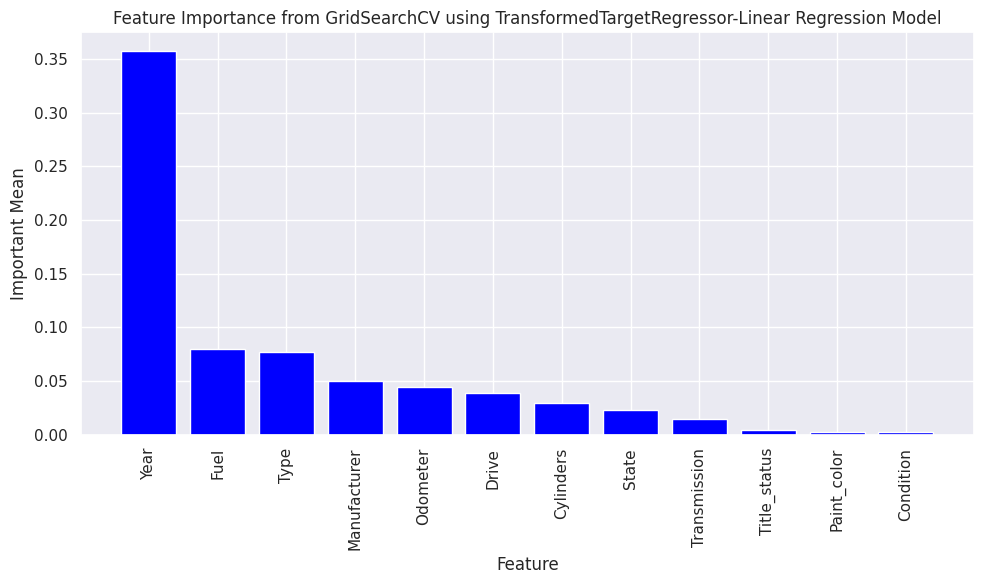

In [77]:
# Plot the feature importance as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(importance_df["feature"], importance_df["importance_mean"], color='blue')
plt.xlabel("Feature")
plt.ylabel("Important Mean")
plt.title("Feature Importance from GridSearchCV using TransformedTargetRegressor-Linear Regression Model")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

For Linear regression using TransformedTargetRegressor model, the best features are `Year`,`Fuel` and `Type`. Let's calculate the co-efficeints for different features for ridge regression. Since, we need to know only the first few coeffecients, so limiting the threshold value as 0.08.

In [78]:
feature_names = best_model.named_steps['preprocess'].get_feature_names_out()
coeffs = best_model.named_steps['lr'].regressor_.coef_

df_coefs = pd.DataFrame({
  'features': feature_names,
  'coeffs': coeffs
})

df_coefs_sorted = df_coefs[abs(df_coefs['coeffs']) > 0.08].sort_values(by='coeffs', ascending=False, key=abs)
df_coefs_sorted.head(10)

,features,coeffs
0,numeric__Year,0.455518
20,ohe__Fuel_Electric,-0.192566
1,numeric__Odometer,-0.152414
19,ohe__Fuel_Diesel,0.150512
23,ohe__Fuel_Other,-0.127680
22,ohe__Fuel_Hybrid,0.102526
2,numeric__Year^2,0.097807


We see that `Year`, `Fuel` and `Type` have the best coefficients.


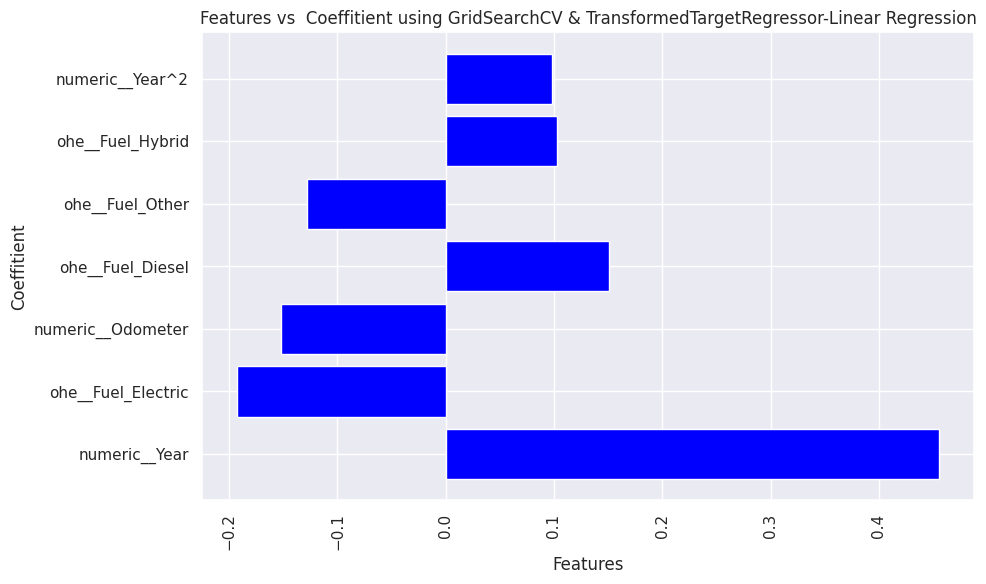

In [79]:
# Plot the feature importance as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_coefs_sorted["features"], df_coefs_sorted["coeffs"], color='blue')
plt.xlabel("Features")
plt.ylabel("Coeffitient")
plt.title("Features vs  Coeffitient using GridSearchCV & TransformedTargetRegressor-Linear Regression")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

### **Linear Regression Feature Selection and TransformedTargetRegressor**

Along with Linear Regression and TransformedTargetRegressor, we add a transformer that performs Sequential Feature Selection with Lasso.

This Sequential Feature Selector adds (forward selection) or removes (backward selection) features to form a feature subset in a greedy fashion. At each stage, this estimator chooses the best feature to add or remove based on the cross-validation score of an estimator.

In [80]:
pipe = Pipeline([
  ('preprocess', column_trans),
  ('feature_selection', SequentialFeatureSelector(Lasso(), n_features_to_select=4, scoring='neg_mean_squared_error')),
  ('lr', TransformedTargetRegressor(regressor=LinearRegression(), func=np.log, inverse_func=np.exp))
])
pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(random_state=42)),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1,
                                                                                      include_bias=False))]),
                                                  ['Year', 'Odometer']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   RandomSampleImputer(random_state=10)),
                                                                  ('e...
                                                  Pipeline(steps=[('imputer',
                                                                   RandomSampleImputer(random_state=10)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Fuel', 'Drive'])])),
                ('feature_selection',
                 SequentialFeatureSelector(estimator=Lasso(),
                                           n_features_to_select=4,
                                           scoring='neg_mean_squared_error')),
                ('lr',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=LinearRegression()))])

In [81]:
param_grid = {
  'preprocess__numeric__poly__degree': range(1, 4),
  'feature_selection__n_features_to_select': [4, 5, 6]
}
grid_linear = GridSearchCV(estimator=pipe,
                    param_grid=param_grid, scoring = 'neg_mean_squared_error', verbose=True, n_jobs=-1, cv=3, error_score='raise')

train_mse, test_mse, r2, best_model, best_param = run_grid(grid_linear, X_train, y_train)
print(f'Train MSE using GridSearchCV using Linear Regression with Feature selection & TransformedTargetRegressor: {train_mse}')
print(f'Test MSE using GridSearchCV using Linear Regression with Feature selection & TransformedTargetRegressor: {test_mse}')
print(f'R-squared score using GridSearchCV using Linear Regression & TransformedTargetRegressor: {r2}\n')
print(f'Test RMSE using GridSearchCV using Linear Regression with Feature selection & TransformedTargetRegressor: {sqrt(train_mse)}')
print(f'Test RMSE using GridSearchCV using Linear Regression with Feature selection & TransformedTargetRegressor: {sqrt(test_mse)}\n')
print(f'Best params using GridSearchCV using Linear Regression with Feature selection & TransformedTargetRegressor: {best_params}')

update_results('lr', 'LinearRegression with SFS_TTR', best_params, train_mse, test_mse, sqrt(train_mse), sqrt(test_mse), r2)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_function_transformer.py:190: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


Train MSE using GridSearchCV using Linear Regression with Feature selection & TransformedTargetRegressor: 101928935.28350307
Test MSE using GridSearchCV using Linear Regression with Feature selection & TransformedTargetRegressor: 98857350.06337582
R-squared score using GridSearchCV using Linear Regression & TransformedTargetRegressor: 0.48333949881530935

Test RMSE using GridSearchCV using Linear Regression with Feature selection & TransformedTargetRegressor: 10095.986097628258
Test RMSE using GridSearchCV using Linear Regression with Feature selection & TransformedTargetRegressor: 9942.703357909046

Best params using GridSearchCV using Linear Regression with Feature selection & TransformedTargetRegressor: {'preprocess__numeric__poly__degree': 3}
Model and results:

   regressor                         method                                        grid_params  \
0     ridge                          Ridge  {'preprocess__numeric__poly__degree': 3, 'ridg...   
1     lasso                 

Permutation feature importance is a model inspection technique that measures the contribution of each feature to a fitted model’s statistical performance on a given tabular dataset.

In [82]:
from sklearn.inspection import permutation_importance
r = permutation_importance(best_model, X, y,
                            n_repeats=10,
                            random_state=0)
parameters = {'feature': [], 'importance_mean': [], 'importance_std': []}
for i in r.importances_mean.argsort()[::-1]:
    print(f"{X.columns.tolist()[i]:<8} "
          f"{r.importances_mean[i]:.3f}"
          f" +/- {r.importances_std[i]:.3f}")
    parameters['feature'].append(X.columns.tolist()[i])
    parameters['importance_mean'].append(r.importances_mean[i])
    parameters['importance_std'].append(r.importances_std[i])

importance_df = pd.DataFrame(parameters)
importance_df.head(10)

Year     0.311 +/- 0.003
Odometer 0.128 +/- 0.002
Type     0.124 +/- 0.001
Fuel     0.085 +/- 0.001
Manufacturer 0.081 +/- 0.001
State    0.000 +/- 0.000
Paint_color 0.000 +/- 0.000
Drive    0.000 +/- 0.000
Transmission 0.000 +/- 0.000
Title_status 0.000 +/- 0.000
Cylinders 0.000 +/- 0.000
Condition 0.000 +/- 0.000


,feature,importance_mean,importance_std
0,Year,0.310646,0.002671
1,Odometer,0.127558,0.001547
2,Type,0.123994,0.001156
3,Fuel,0.084900,0.001274
4,Manufacturer,0.081279,0.000808
5,State,0.000000,0.000000
6,Paint_color,0.000000,0.000000
7,Drive,0.000000,0.000000
8,Transmission,0.000000,0.000000
9,Title_status,0.000000,0.000000


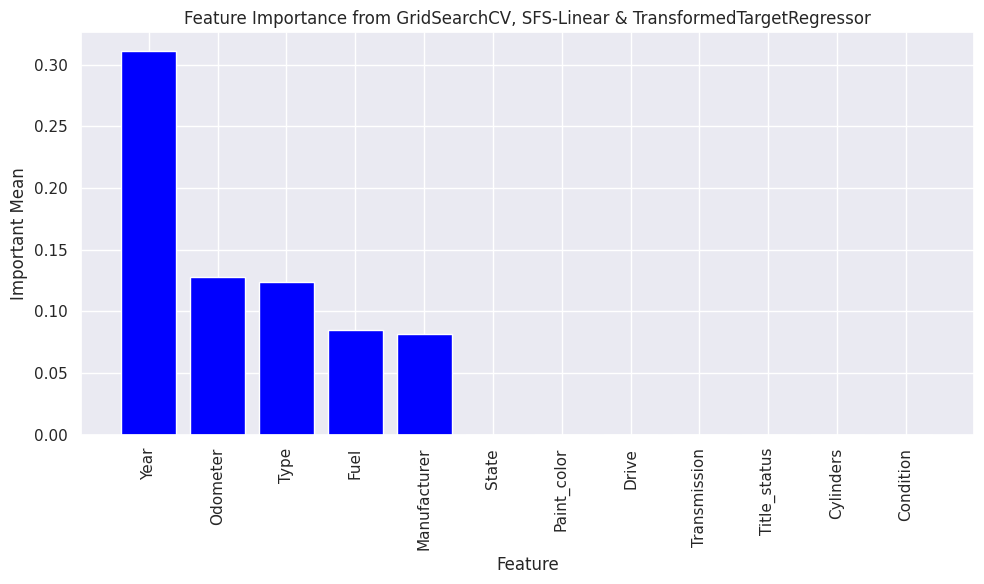

In [83]:
# Plot the feature importance as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(importance_df["feature"], importance_df["importance_mean"], color='blue')
plt.xlabel("Feature")
plt.ylabel("Important Mean")
plt.title("Feature Importance from GridSearchCV, SFS-Linear & TransformedTargetRegressor")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

For Ridge model, the best features are `Manufaturer`, `Year` and `Odometer`. Let's calculate the co-efficeints for different features for ridge regression. Since, we need to know only the first few coeffecients, so limiting the threshold value as 0.01.

In [84]:
size = len(best_model.named_steps['lr'].regressor_.coef_)
feature_names = best_model.named_steps['preprocess'].get_feature_names_out()[:size]
coeffs = best_model.named_steps['lr'].regressor_.coef_

df_coefs = pd.DataFrame({
  'features': feature_names,
  'coeffs': coeffs
})

df_coefs_sorted = df_coefs[abs(df_coefs['coeffs']) > 0.01].sort_values(by='coeffs', ascending=False, key=abs)
df_coefs_sorted.head(10)

,features,coeffs
5,categorical__Manufacturer,0.529420
0,numeric__Year,0.416097
1,numeric__Odometer,-0.174518
2,numeric__Year^2,0.060602


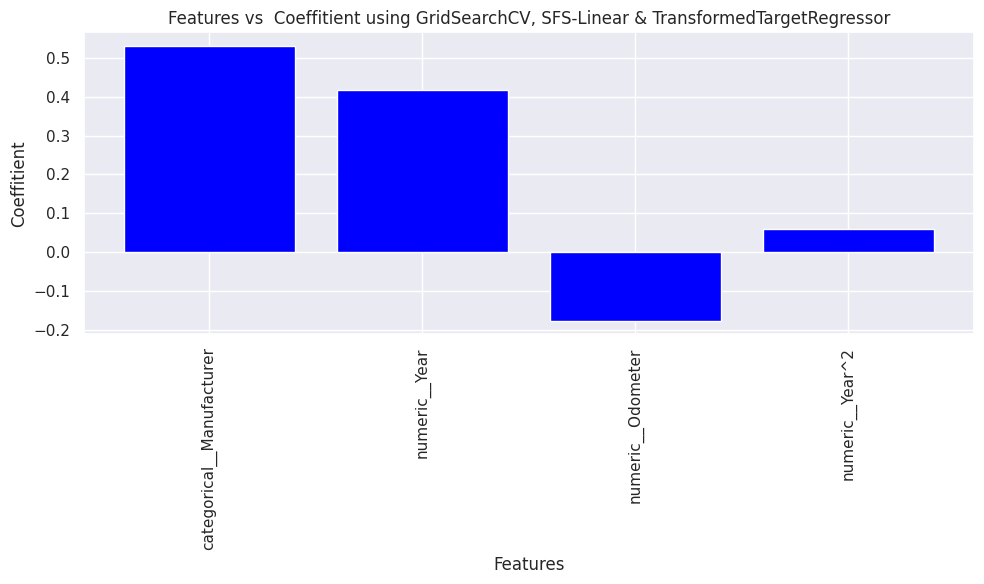

In [85]:
# Plot the feature importance as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_coefs_sorted["features"], df_coefs_sorted["coeffs"], color='blue')
plt.xlabel("Features")
plt.ylabel("Coeffitient")
plt.title("Features vs  Coeffitient using GridSearchCV, SFS-Linear & TransformedTargetRegressor")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on dealers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to provide recommendation to the client.

We have the model results in a dataframe and we discover the following:
- Ridge and Lasso models provide almost the same r-squared and RMSE.
  Ridge (RMSE=8836.036660, r-squared=0.591952); Lasso(RMSE=8836.061373, 0.591952)

- LinearRegression with SFS_TTR showed the worst performance in terms if r-squared(0.483339) and RMSE(9942.703358).

- Polynomial degree for the best performing Ridge model is 3.

- Linear Regression did not give good results (RMSE=9033.376346), (r-squared=0.57352), it was worse when combined with TransformedTargetRegressor(RMSE=9536.987786), (r-squared=0.524644) and worst when combining feature selection using SequentialFeatureSelector with TransformedTargetRegressor(RMSE=9942.703358), (r-squared=0.483339).

Below table summarizes the model performance results for each modeling technique.

We've modeled the data for:

1. Ridge regression
2. Lasso regression
3. Linear regression
4. Linear regression with TransformedTargetRegressor ; 3-degree Polynomial
5. Linear regression with Feature Selection (SFS) and TransformedTargetRegressor







We see a better `R-Squared = 0.591952` with Ridge followed by `R-Square=0.591950` for Lasso Model.

Let's visualize the different model vs R-Squared using a barplot (seaborn).

In [86]:
df_model_results = pd.DataFrame(model_results)
df_model_results

,regressor,method,grid_params,train_mse,test_mse,train_rmse,test_rmse,r_squared
0,ridge,Ridge,"{'preprocess__numeric__poly__degree': 3, 'ridg...",8.191144e+07,7.807554e+07,9050.493797,8836.036660,0.591952
1,lasso,Lasso,"{'lasso__alpha': 0.1, 'lasso__max_iter': 100, ...",8.191201e+07,7.807598e+07,9050.525427,8836.061373,0.591950
2,lr,LinearRegression,{'preprocess__numeric__poly__degree': 9},8.040437e+07,8.160189e+07,8966.848174,9033.376346,0.573522
3,lr,LinearRegression with TTR,{'preprocess__numeric__poly__degree': 3},9.454089e+07,9.095414e+07,9723.214031,9536.987786,0.524644
4,lr,LinearRegression with SFS_TTR,{'preprocess__numeric__poly__degree': 3},1.019289e+08,9.885735e+07,10095.986098,9942.703358,0.483339


Plotting the model performance using R-squared and RMSE as following.

<ipython-input-89-a39ac1f93419>:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  ax = sns.barplot(df_model_results, x='r_squared', y='method', hue='r_squared', color='blue', legend=False)


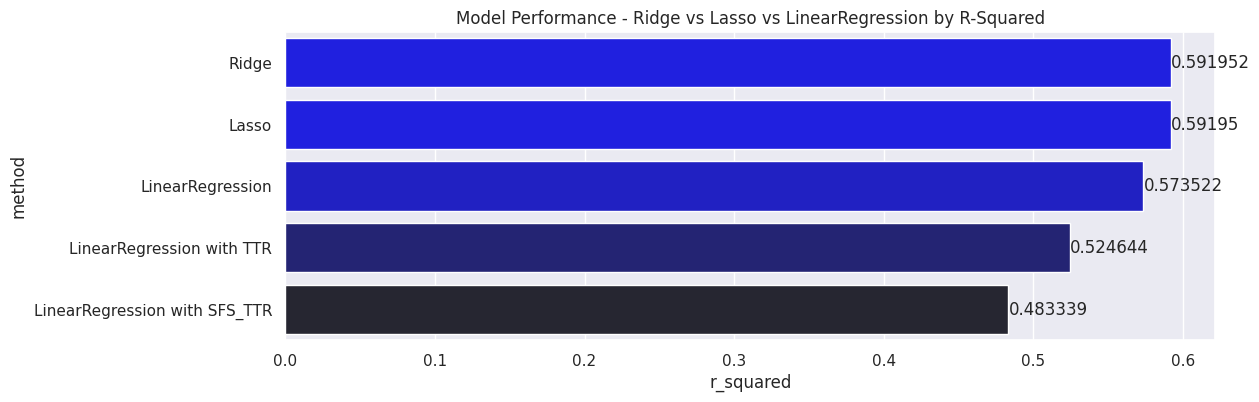

In [89]:
figsize = (12, 4)
plt.figure(figsize=figsize)
ax = sns.barplot(df_model_results, x='r_squared', y='method', hue='r_squared', color='blue', legend=False)
ax.set(title='Model Performance - Ridge vs Lasso vs LinearRegression by R-Squared')
for container in ax.containers:
    ax.bar_label(container)

Evidently, Ridge shows a better performance followed by Lasso for the R-Squared.

<ipython-input-92-83e5359a14c3>:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  ax = sns.barplot(df_model_results, x='test_rmse', y='method', hue='test_rmse', color='blue', legend=False)


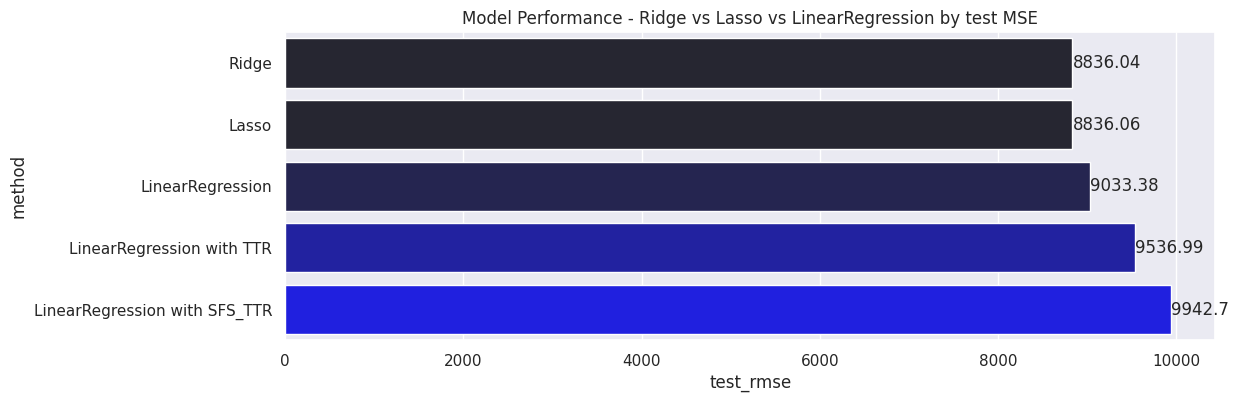

In [92]:
figsize = (12, 4)
plt.figure(figsize=figsize)
ax = sns.barplot(df_model_results, x='test_rmse', y='method', hue='test_rmse', color='blue', legend=False)
ax.set(title='Model Performance - Ridge vs Lasso vs LinearRegression by test MSE')
for container in ax.containers:
    ax.bar_label(container)

For the test RMSE, Linear Regression with Feature Slection (SFS) and TransformedTargetRegressor gave a higher price of ~9943, followed by Linear Regression with TransformedTargetRegressor with a price value of ~9537.

The following variables are the top predictors in the model:

1.   Year
2.   Odometer
3.    Fuel type  


There are a large number of records with missing and other values. Instead of imputing these values, we decided to use OneHot, Ordinal, and JamesStein encoding after assigning missing and other to different categories, which increased the dimensionality of the dataset.



### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Based on the findings presented earlier, the data indicates that key factors influencing car prices include the year, odometer reading, fuel type, number of cylinders, and car type, making them pivotal in predicting car prices.

Given that year and odometer were identified as the primary influential factors, our recommendation for purchasing used cars for the dealership would emphasize acquiring newer vehicles with low odometer readings. Conversely, it's advisable to steer clear of vehicles with high odometer readings and older models.

Additionally, the data reveals that the number of cylinders (with more cylinders correlating to higher prices), car type (specifically 4WD), and fuel type (particularly diesel) contribute to increasing the price. Hence, it's prudent to emphasize these attributes when marketing a used car and to carefully consider them when determining pricing for used vehicles.

### Future Work

1. Automate repetitive tasks: To streamline repetitive tasks like data preprocessing, feature engineering, and hyperparameter tuning. This not only saves you time but also reduces the risk of errors and inconsistencies in your pipeline.
2. Evaluate model performance using other models.
3. The dataset could be enhanced further by pulling information from public resources. For example, features such as gas mileage, number of doors, luxury/economy indicator might also be good predictors of resale value. This information could be pulled online by the using the column for 'model'.


